# Regresión
## Grupo 5
### Manuel García Plaza, José Miguel Ramírez Muñoz

In [1]:
data = read.csv('hotel_reservations.csv')
head(data)


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<chr>
1,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
2,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
3,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
4,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
5,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
6,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled


Lo primero es depurar nuestros datos de acuerdo con lo hecho en el EDA.

- Eliminamos las 7 habitaciones de tipo 3.
- Eliminamos las reservas con precios medios menores que 10$.
- Eliminamos los tipos de reserva que no son online, offline o de agencia.
- Eliminamos los menús tipo 3.
- Eliminamos la reserva con precio medio de 540.
- Eliminamos la columna de año.
- Eliminamos la columna de las ID.

In [2]:
noprecio = which(data$avg_price_per_room <= 10)
notipohabitacion = which(data$room_type_reserved=='Room_Type 3')
notiporeserva = which(data$market_segment_type == 'Aviation' | data$market_segment_type == 'Complementary')
nomenu = which(data$type_of_meal_plan == 'Meal Plan 3')
outlierprecio = which(data$avg_price_per_room == 540)
eliminados = c(noprecio, notipohabitacion, notiporeserva, nomenu)


newdata = data[-eliminados ,-c(1,10)]

Así queda el nuevo dataset:

In [3]:
head(newdata)
length(data[,1])
length(newdata[,1])

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<chr>
1,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,10,2,Offline,0,0,0,65.00,0,Not_Canceled
2,2,0,2,3,Not Selected,0,Room_Type 1,5,11,6,Online,0,0,0,106.68,1,Not_Canceled
3,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2,28,Online,0,0,0,60.00,0,Canceled
4,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,5,20,Online,0,0,0,100.00,0,Canceled
5,2,0,1,1,Not Selected,0,Room_Type 1,48,4,11,Online,0,0,0,94.50,0,Canceled
6,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,9,13,Online,0,0,0,115.00,1,Canceled


[1] 36275

[1] 35528

AHORA YO VERIA CON ANOVAS SI REALMENTE HAY DIFERENCIAS ENTRE LOS GRUPOS QUE PLANTEAMOS EN EL EDA Y A PARTIR DE AHI MONTAMOS REGRESIONES

COMPARAMOS REGRESIONES CON TODAS LAS VARIABLES, VAMOS QUITANDO LAS QUE NO APORTAN, COMPARAMOS CON LAS MISMAS VARIABLES PERO POR EJEMPLO ROOMTYPE 1,2,...7 VS JUNTANDO 1 Y 2, 4 Y 5, 6 Y 7

## ANOVA.

### Room type.

In [4]:
aovRT <- aov(avg_price_per_room ~ room_type_reserved,data = newdata)
summary(aovRT)
# plot(aovRT)

                      Df   Sum Sq Mean Sq F value Pr(>F)    
room_type_reserved     5 12143732 2428746    3320 <2e-16 ***
Residuals          35522 25982810     731                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Hay diferencias para este factor en los grupos, pero dónde?

In [5]:
# pairwise.t.test(x = avg_price_per_room , g = room_type_reserved,data = newdata)
TukeyHSD(aovRT)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = avg_price_per_room ~ room_type_reserved, data = newdata)

$room_type_reserved
                              diff        lwr        upr     p adj
Room_Type 2-Room_Type 1  -4.687300  -7.734217  -1.640383 0.0001693
Room_Type 4-Room_Type 1  29.434707  28.331537  30.537877 0.0000000
Room_Type 5-Room_Type 1  35.971374  31.025671  40.917077 0.0000000
Room_Type 6-Room_Type 1  88.081117  85.536671  90.625563 0.0000000
Room_Type 7-Room_Type 1 112.185987 105.045648 119.326326 0.0000000
Room_Type 4-Room_Type 2  34.122007  30.948558  37.295456 0.0000000
Room_Type 5-Room_Type 2  40.658674  34.886866  46.430482 0.0000000
Room_Type 6-Room_Type 2  92.768417  88.853318  96.683516 0.0000000
Room_Type 7-Room_Type 2 116.873287 109.137769 124.608805 0.0000000
Room_Type 5-Room_Type 4   6.536667   1.512023  11.561311 0.0028746
Room_Type 6-Room_Type 4  58.646410  55.951734  61.341087 0.0000000
Room_Type 7-Room_Type 4

Tukey está diseñado para grupos con tamaños similares pero aquí eso no se cumple...
Lo que vemos es que todos son muy distintos, los que mas se parecen son 1 con 2 y 4 con 5.

In [6]:
pairwise.t.test(newdata$avg_price_per_room, newdata$room_type_reserved, p.adjust.method='fdr')


	Pairwise comparisons using t tests with pooled SD 

data:  newdata$avg_price_per_room and newdata$room_type_reserved 

            Room_Type 1 Room_Type 2 Room_Type 4 Room_Type 5 Room_Type 6
Room_Type 2 1.3e-05     -           -           -           -          
Room_Type 4 < 2e-16     < 2e-16     -           -           -          
Room_Type 5 < 2e-16     < 2e-16     0.00021     -           -          
Room_Type 6 < 2e-16     < 2e-16     < 2e-16     < 2e-16     -          
Room_Type 7 < 2e-16     < 2e-16     < 2e-16     < 2e-16     < 2e-16    

P value adjustment method: fdr 

Veamos la relación que tienen las distintas variables sobre el roomtype

### Cancelaciones.

In [7]:
aovRT <- aov(avg_price_per_room ~ room_type_reserved,data = newdata)
summary(aovRT)

                      Df   Sum Sq Mean Sq F value Pr(>F)    
room_type_reserved     5 12143732 2428746    3320 <2e-16 ***
Residuals          35522 25982810     731                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Cancelaciones en newdata

In [8]:
length(which(newdata$booking_status == 'Not_Canceled'))/35528

[1] 0.666798

## Modelos logísticos

### Regresión con todo

POSIBLEMENTE SEA INTERESANTE METER ESO DEL FACTOR ANIDADO EN REPEATED GUEST Y RESERVAS PREVIAS

In [9]:
# newdata_table <- as.table(newdata, header = T)
booking_canceled <- rep(1,35528)
booking_canceled[newdata$booking_status == 'Not_Canceled'] = 0

library('ggplot2')

In [10]:
reglog_todo = glm(booking_canceled ~ newdata$no_of_adults + newdata$no_of_children + newdata$repeated_guest +
                newdata$no_of_previous_bookings_not_canceled + newdata$no_of_previous_cancellations + 
                newdata$avg_price_per_room + newdata$no_of_week_nights + newdata$no_of_weekend_nights + 
                newdata$type_of_meal_plan + newdata$no_of_special_requests +
                newdata$required_car_parking_space + newdata$room_type_reserved +
                newdata$market_segment_type + as.factor(newdata$arrival_month) + newdata$lead_time ,  
                family=binomial)
summary(reglog_todo)


Call:
glm(formula = booking_canceled ~ newdata$no_of_adults + newdata$no_of_children + 
    newdata$repeated_guest + newdata$no_of_previous_bookings_not_canceled + 
    newdata$no_of_previous_cancellations + newdata$avg_price_per_room + 
    newdata$no_of_week_nights + newdata$no_of_weekend_nights + 
    newdata$type_of_meal_plan + newdata$no_of_special_requests + 
    newdata$required_car_parking_space + newdata$room_type_reserved + 
    newdata$market_segment_type + as.factor(newdata$arrival_month) + 
    newdata$lead_time, family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6707  -0.6400  -0.3106   0.5989   3.0189  

Coefficients:
                                               Estimate Std. Error z value
(Intercept)                                  -6.1896318  0.2348757 -26.353
newdata$no_of_adults                          0.1111467  0.0326106   3.408
newdata$no_of_children                        0.2113250  0.0514541   4.107
newdata$repeated_gu

In [11]:
(reglog_todo$null.deviance - reglog_todo$deviance)/reglog_todo$null.deviance

[1] 0.3423995

aplicamos step

In [12]:
step(reglog_todo, direction = 'both')

Start:  AIC=29801.8
booking_canceled ~ newdata$no_of_adults + newdata$no_of_children + 
    newdata$repeated_guest + newdata$no_of_previous_bookings_not_canceled + 
    newdata$no_of_previous_cancellations + newdata$avg_price_per_room + 
    newdata$no_of_week_nights + newdata$no_of_weekend_nights + 
    newdata$type_of_meal_plan + newdata$no_of_special_requests + 
    newdata$required_car_parking_space + newdata$room_type_reserved + 
    newdata$market_segment_type + as.factor(newdata$arrival_month) + 
    newdata$lead_time

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
                                               Df Deviance   AIC
<none>                                               29738 29802
- newdata$no_of_previous_bookings_not_canceled  1    29740 29802
- newdata$no_of_adults                          1    29749 29811
- newdata$no_of_previous_cancellations          1    29753 29815
- newdata$no_of_children                        1    29754 29816
-


Call:  glm(formula = booking_canceled ~ newdata$no_of_adults + newdata$no_of_children + 
    newdata$repeated_guest + newdata$no_of_previous_bookings_not_canceled + 
    newdata$no_of_previous_cancellations + newdata$avg_price_per_room + 
    newdata$no_of_week_nights + newdata$no_of_weekend_nights + 
    newdata$type_of_meal_plan + newdata$no_of_special_requests + 
    newdata$required_car_parking_space + newdata$room_type_reserved + 
    newdata$market_segment_type + as.factor(newdata$arrival_month) + 
    newdata$lead_time, family = binomial)

Coefficients:
                                 (Intercept)  
                                    -6.18963  
                        newdata$no_of_adults  
                                     0.11115  
                      newdata$no_of_children  
                                     0.21133  
                      newdata$repeated_guest  
                                    -2.18945  
newdata$no_of_previous_bookings_not_canceled  
         

parece que arrival date es irrelevante (tiene sentido)

### Sin arrival date ni previous booking not canceled

In [13]:
reglog2 = glm(booking_canceled ~ newdata$no_of_adults + newdata$no_of_children + newdata$repeated_guest +
                newdata$no_of_previous_cancellations + 
                newdata$avg_price_per_room + newdata$no_of_week_nights + newdata$no_of_weekend_nights + 
                newdata$type_of_meal_plan + newdata$no_of_special_requests +
                newdata$required_car_parking_space + newdata$room_type_reserved +
                newdata$market_segment_type + as.factor(newdata$arrival_month) + newdata$lead_time,  family=binomial)
summary(reglog2)


Call:
glm(formula = booking_canceled ~ newdata$no_of_adults + newdata$no_of_children + 
    newdata$repeated_guest + newdata$no_of_previous_cancellations + 
    newdata$avg_price_per_room + newdata$no_of_week_nights + 
    newdata$no_of_weekend_nights + newdata$type_of_meal_plan + 
    newdata$no_of_special_requests + newdata$required_car_parking_space + 
    newdata$room_type_reserved + newdata$market_segment_type + 
    as.factor(newdata$arrival_month) + newdata$lead_time, family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6711  -0.6400  -0.3110   0.6002   2.9750  

Coefficients:
                                        Estimate Std. Error z value Pr(>|z|)
(Intercept)                           -6.1873935  0.2342901 -26.409  < 2e-16
newdata$no_of_adults                   0.1112705  0.0326144   3.412 0.000646
newdata$no_of_children                 0.2112878  0.0514548   4.106 4.02e-05
newdata$repeated_guest                -2.4383494  0.4445905  -5

[1] "65%"

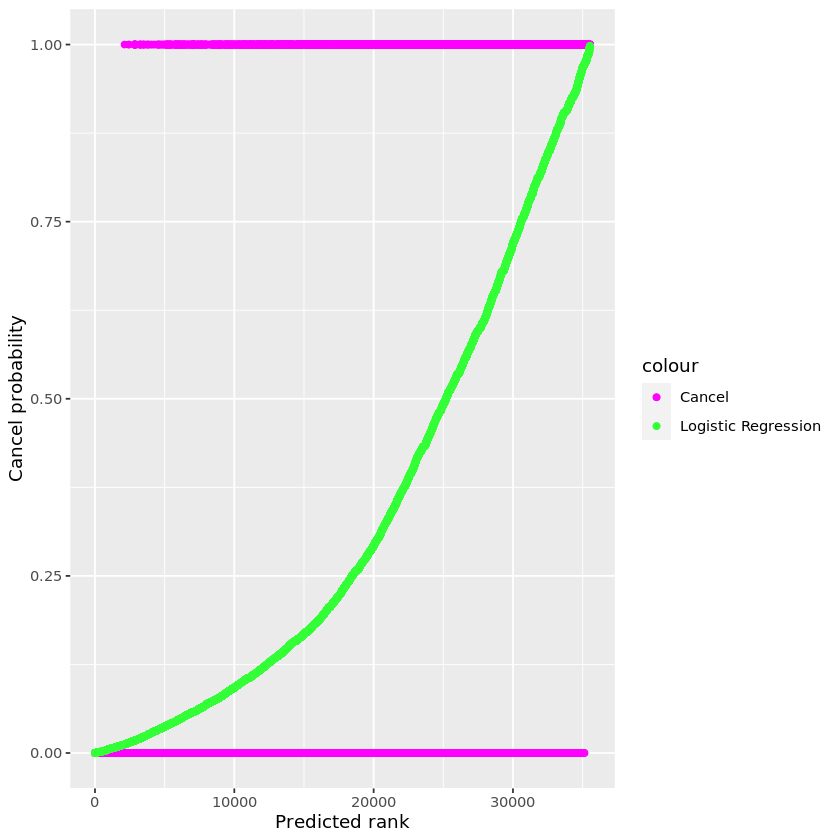

In [14]:
newdata$yhat2 = predict(reglog2, newdata, type = "response")
datarank2 = rank(newdata$yhat2)

ggplot(newdata) +
geom_point(aes(x = datarank2, y = booking_canceled, colour='Cancel')) +
geom_point(aes(x = datarank2, y = newdata$yhat2, colour='Logistic Regression')) +
scale_color_manual(values = c("Cancel" = '#ff00ff', 'Logistic Regression' = '#33ff36')) +
  xlab(label = 'Predicted rank') +
  ylab(label = 'Cancel probability')

sprintf("%0.f%%", 100*sum( (0.1 < newdata$yhat2) & (newdata$yhat2 < 0.9) ) / nrow(newdata))

Sale una basura. Step otra vez:

In [15]:
step(reglog2, direction='both')

Start:  AIC=29802
booking_canceled ~ newdata$no_of_adults + newdata$no_of_children + 
    newdata$repeated_guest + newdata$no_of_previous_cancellations + 
    newdata$avg_price_per_room + newdata$no_of_week_nights + 
    newdata$no_of_weekend_nights + newdata$type_of_meal_plan + 
    newdata$no_of_special_requests + newdata$required_car_parking_space + 
    newdata$room_type_reserved + newdata$market_segment_type + 
    as.factor(newdata$arrival_month) + newdata$lead_time

                                       Df Deviance   AIC
<none>                                       29740 29802
- newdata$no_of_adults                  1    29752 29812
- newdata$no_of_previous_cancellations  1    29754 29814
- newdata$no_of_children                1    29756 29816
- newdata$no_of_week_nights             1    29757 29817
- newdata$type_of_meal_plan             2    29786 29844
- newdata$repeated_guest                1    29800 29860
- newdata$no_of_weekend_nights          1    29810 29870
- newdata


Call:  glm(formula = booking_canceled ~ newdata$no_of_adults + newdata$no_of_children + 
    newdata$repeated_guest + newdata$no_of_previous_cancellations + 
    newdata$avg_price_per_room + newdata$no_of_week_nights + 
    newdata$no_of_weekend_nights + newdata$type_of_meal_plan + 
    newdata$no_of_special_requests + newdata$required_car_parking_space + 
    newdata$room_type_reserved + newdata$market_segment_type + 
    as.factor(newdata$arrival_month) + newdata$lead_time, family = binomial)

Coefficients:
                          (Intercept)                   newdata$no_of_adults  
                             -6.18739                                0.11127  
               newdata$no_of_children                 newdata$repeated_guest  
                              0.21129                               -2.43835  
 newdata$no_of_previous_cancellations             newdata$avg_price_per_room  
                              0.27986                                0.01916  
          

Type meal parece ser importante a pesar de que el tipo 2 no lo es. Vamos a reestructurar esta variable en SÍ elige (tipo 1/tipo 2) o NO elige.

In [16]:
##DIME SI TE PARECE BIEN QUE 0 SEA NO SELECTED 

mealselected <- rep(1,35528)
mealselected[newdata$type_of_meal_plan == 'Not Selected'] = 0


### Cambiando formato meal plan

In [17]:
reglog3 =  glm(booking_canceled ~ newdata$no_of_adults + newdata$no_of_children + newdata$repeated_guest +
                newdata$no_of_previous_cancellations + 
                newdata$avg_price_per_room + newdata$no_of_week_nights + newdata$no_of_weekend_nights + 
                mealselected + newdata$no_of_special_requests +
                newdata$required_car_parking_space + newdata$room_type_reserved +
                newdata$market_segment_type + as.factor(newdata$arrival_month) + newdata$lead_time,  family=binomial)
summary(reglog3)


Call:
glm(formula = booking_canceled ~ newdata$no_of_adults + newdata$no_of_children + 
    newdata$repeated_guest + newdata$no_of_previous_cancellations + 
    newdata$avg_price_per_room + newdata$no_of_week_nights + 
    newdata$no_of_weekend_nights + mealselected + newdata$no_of_special_requests + 
    newdata$required_car_parking_space + newdata$room_type_reserved + 
    newdata$market_segment_type + as.factor(newdata$arrival_month) + 
    newdata$lead_time, family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6474  -0.6398  -0.3112   0.5978   2.9703  

Coefficients:
                                        Estimate Std. Error z value Pr(>|z|)
(Intercept)                           -5.9107917  0.2364282 -25.000  < 2e-16
newdata$no_of_adults                   0.1118634  0.0326063   3.431 0.000602
newdata$no_of_children                 0.2081663  0.0514521   4.046 5.21e-05
newdata$repeated_guest                -2.4334715  0.4446437  -5.473 4.43e-08

Parece buena decisión haber hecho esta modificación

[1] "65%"

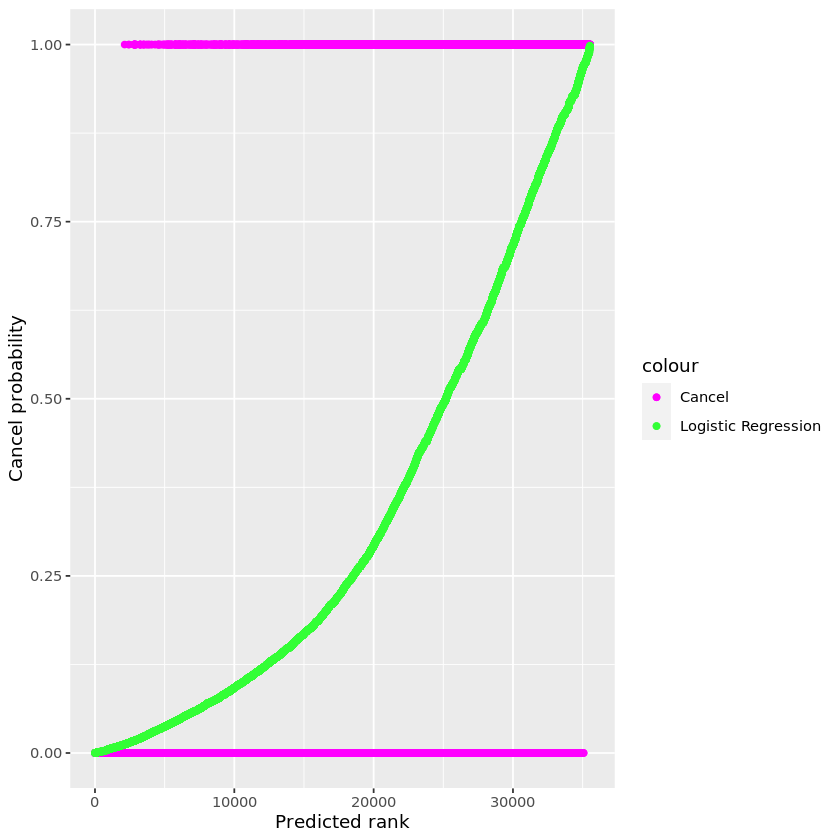

In [18]:
newdata$yhat3 = predict(reglog3, newdata, type = "response")
datarank3 = rank(newdata$yhat3)

ggplot(newdata) +
geom_point(aes(x = datarank3, y = booking_canceled, colour='Cancel')) +
geom_point(aes(x = datarank3, y = newdata$yhat3, colour='Logistic Regression')) +
scale_color_manual(values = c("Cancel" = '#ff00ff', 'Logistic Regression' = '#33ff36')) +
  xlab(label = 'Predicted rank') +
  ylab(label = 'Cancel probability')

sprintf("%0.f%%", 100*sum( (0.1 < newdata$yhat3) & (newdata$yhat3 < 0.9) ) / nrow(newdata))

Sigue siendo terrible.

In [19]:
step(reglog3, direction = 'both')

Start:  AIC=29803.25
booking_canceled ~ newdata$no_of_adults + newdata$no_of_children + 
    newdata$repeated_guest + newdata$no_of_previous_cancellations + 
    newdata$avg_price_per_room + newdata$no_of_week_nights + 
    newdata$no_of_weekend_nights + mealselected + newdata$no_of_special_requests + 
    newdata$required_car_parking_space + newdata$room_type_reserved + 
    newdata$market_segment_type + as.factor(newdata$arrival_month) + 
    newdata$lead_time

                                       Df Deviance   AIC
<none>                                       29743 29803
- newdata$no_of_adults                  1    29755 29813
- newdata$no_of_previous_cancellations  1    29757 29815
- newdata$no_of_children                1    29759 29817
- newdata$no_of_week_nights             1    29760 29818
- mealselected                          1    29786 29844
- newdata$repeated_guest                1    29803 29861
- newdata$no_of_weekend_nights          1    29813 29871
- newdata$room_type


Call:  glm(formula = booking_canceled ~ newdata$no_of_adults + newdata$no_of_children + 
    newdata$repeated_guest + newdata$no_of_previous_cancellations + 
    newdata$avg_price_per_room + newdata$no_of_week_nights + 
    newdata$no_of_weekend_nights + mealselected + newdata$no_of_special_requests + 
    newdata$required_car_parking_space + newdata$room_type_reserved + 
    newdata$market_segment_type + as.factor(newdata$arrival_month) + 
    newdata$lead_time, family = binomial)

Coefficients:
                          (Intercept)                   newdata$no_of_adults  
                             -5.91079                                0.11186  
               newdata$no_of_children                 newdata$repeated_guest  
                              0.20817                               -2.43347  
 newdata$no_of_previous_cancellations             newdata$avg_price_per_room  
                              0.27873                                0.01945  
            newdata$no_

Aunque el step no lo detecte, vamos a suprimir el número de adultos.

### Sin no_of_adults

In [20]:
reglog4 =  glm(booking_canceled ~ newdata$no_of_children + newdata$repeated_guest +
                newdata$no_of_previous_cancellations + 
                newdata$avg_price_per_room + newdata$no_of_week_nights + newdata$no_of_weekend_nights + 
                mealselected + newdata$no_of_special_requests +
                newdata$required_car_parking_space + newdata$room_type_reserved +
                newdata$market_segment_type + as.factor(newdata$arrival_month) + 
                newdata$lead_time,  family=binomial)
summary(reglog4)


Call:
glm(formula = booking_canceled ~ newdata$no_of_children + newdata$repeated_guest + 
    newdata$no_of_previous_cancellations + newdata$avg_price_per_room + 
    newdata$no_of_week_nights + newdata$no_of_weekend_nights + 
    mealselected + newdata$no_of_special_requests + newdata$required_car_parking_space + 
    newdata$room_type_reserved + newdata$market_segment_type + 
    as.factor(newdata$arrival_month) + newdata$lead_time, family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6805  -0.6403  -0.3123   0.5942   2.9794  

Coefficients:
                                        Estimate Std. Error z value Pr(>|z|)
(Intercept)                           -5.7992577  0.2341210 -24.770  < 2e-16
newdata$no_of_children                 0.1857774  0.0512076   3.628 0.000286
newdata$repeated_guest                -2.4508928  0.4462489  -5.492 3.97e-08
newdata$no_of_previous_cancellations   0.2816542  0.0754012   3.735 0.000187
newdata$avg_price_per_room 

[1] "65%"

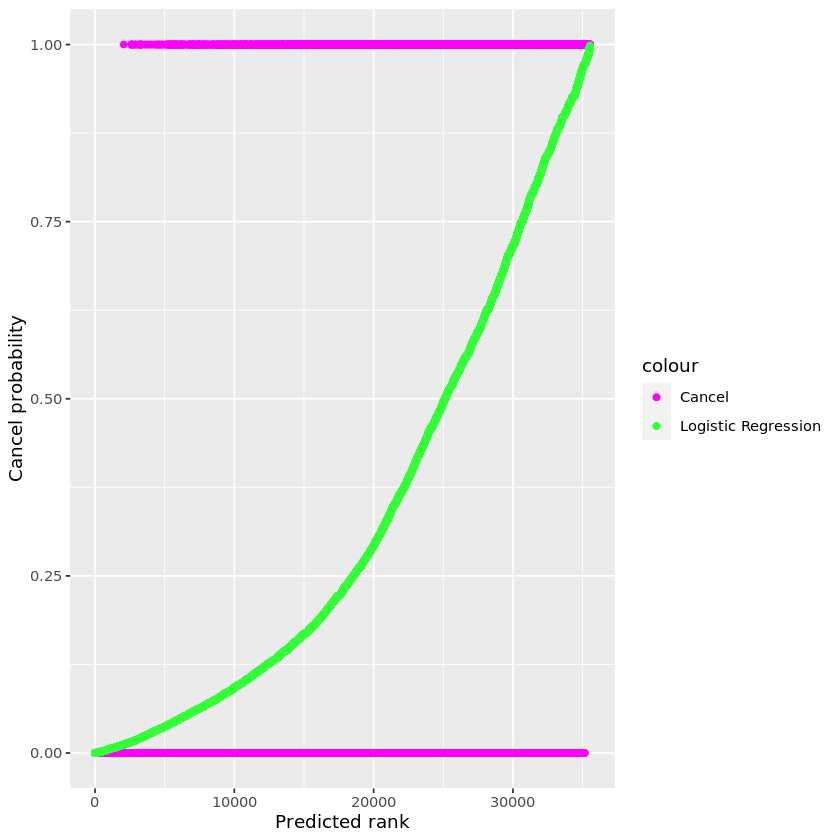

In [21]:
newdata$yhat4 = predict(reglog4, newdata, type = "response")
datarank4 = rank(newdata$yhat4)

ggplot(newdata) +
geom_point(aes(x = datarank4, y = booking_canceled, colour='Cancel')) +
geom_point(aes(x = datarank4, y = newdata$yhat4, colour='Logistic Regression')) +
scale_color_manual(values = c("Cancel" = '#ff00ff', 'Logistic Regression' = '#33ff36')) +
  xlab(label = 'Predicted rank') +
  ylab(label = 'Cancel probability')

sprintf("%0.f%%", 100*sum( (0.1 < newdata$yhat4) & (newdata$yhat4 < 0.9) ) / nrow(newdata))

Sigue dejando mucho que desear.

Debería tener esta pinta:

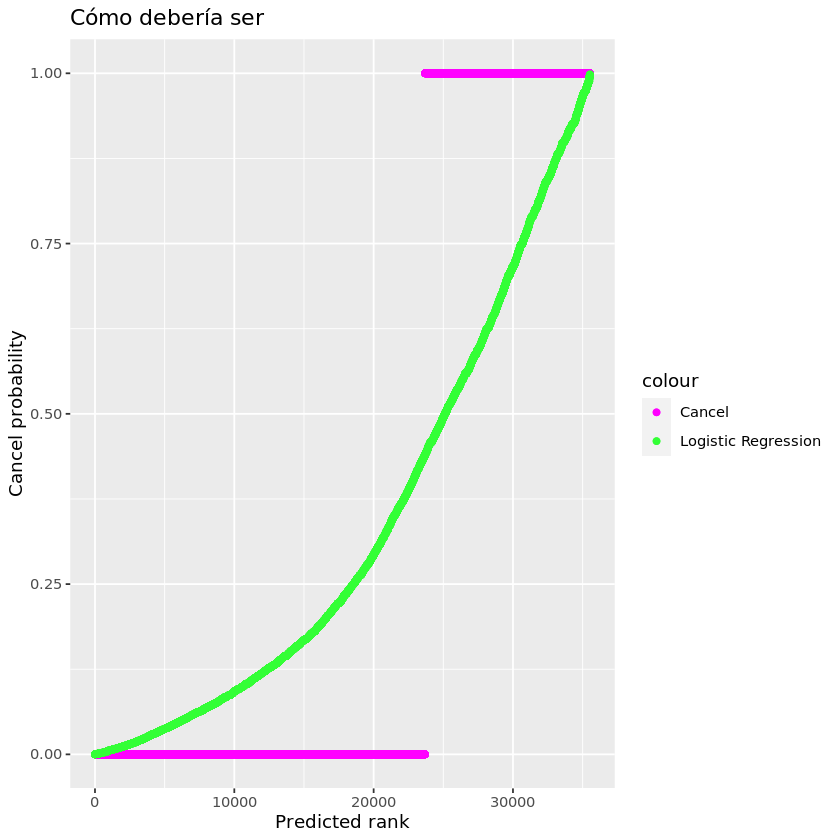

In [22]:
ggplot(newdata) + 
    geom_point(aes(x=seq(1, 35528), y=sort(booking_canceled), colour='Cancel')) + 
    geom_point(aes(x=seq(1, 35528), y=sort(newdata$yhat4), colour='Logistic Regression')) +
    scale_color_manual(values = c("Cancel" = '#ff00ff', 'Logistic Regression' = '#33ff36')) +
    xlab(label = 'Predicted rank') +
    ylab(label = 'Cancel probability') + 
    ggtitle('Cómo debería ser')

Una posible causa es que no hay casi coeficientes mayores que cero, que son los que favorecen la propensión a cancelar

In [23]:
data.frame(booking_canceled, newdata$yhat4)
length(which(newdata$yhat4 > 0.9))

booking_canceled,newdata.yhat4
<dbl>,<dbl>
0,0.57298688
0,0.21445327
1,0.30206093
1,0.90514325
1,0.55879663
1,0.96338955
0,0.16187496
0,0.07253052
0,0.07778614


[1] 1828

Se puede observar que no_of_children es significativo al límite. Vamos a eliminarlo a ver qué sucede:

### Sin no_of_children

In [24]:
reglog5 = glm(booking_canceled ~ newdata$repeated_guest +
                newdata$no_of_previous_cancellations + 
                newdata$avg_price_per_room + newdata$no_of_week_nights + newdata$no_of_weekend_nights + 
                mealselected + newdata$no_of_special_requests +
                newdata$required_car_parking_space + newdata$room_type_reserved +
                newdata$market_segment_type + newdata$arrival_month + 
                newdata$lead_time,  family=binomial)
summary(reglog5)


Call:
glm(formula = booking_canceled ~ newdata$repeated_guest + newdata$no_of_previous_cancellations + 
    newdata$avg_price_per_room + newdata$no_of_week_nights + 
    newdata$no_of_weekend_nights + mealselected + newdata$no_of_special_requests + 
    newdata$required_car_parking_space + newdata$room_type_reserved + 
    newdata$market_segment_type + newdata$arrival_month + newdata$lead_time, 
    family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8918  -0.6655  -0.3459   0.6199   3.0067  

Coefficients:
                                        Estimate Std. Error z value Pr(>|z|)
(Intercept)                           -3.3330596  0.1070072 -31.148  < 2e-16
newdata$repeated_guest                -2.4016605  0.4290127  -5.598 2.17e-08
newdata$no_of_previous_cancellations   0.2002226  0.0624377   3.207 0.001342
newdata$avg_price_per_room             0.0196506  0.0005914  33.228  < 2e-16
newdata$no_of_week_nights              0.0341917  0.0103332   3

[1] "67%"

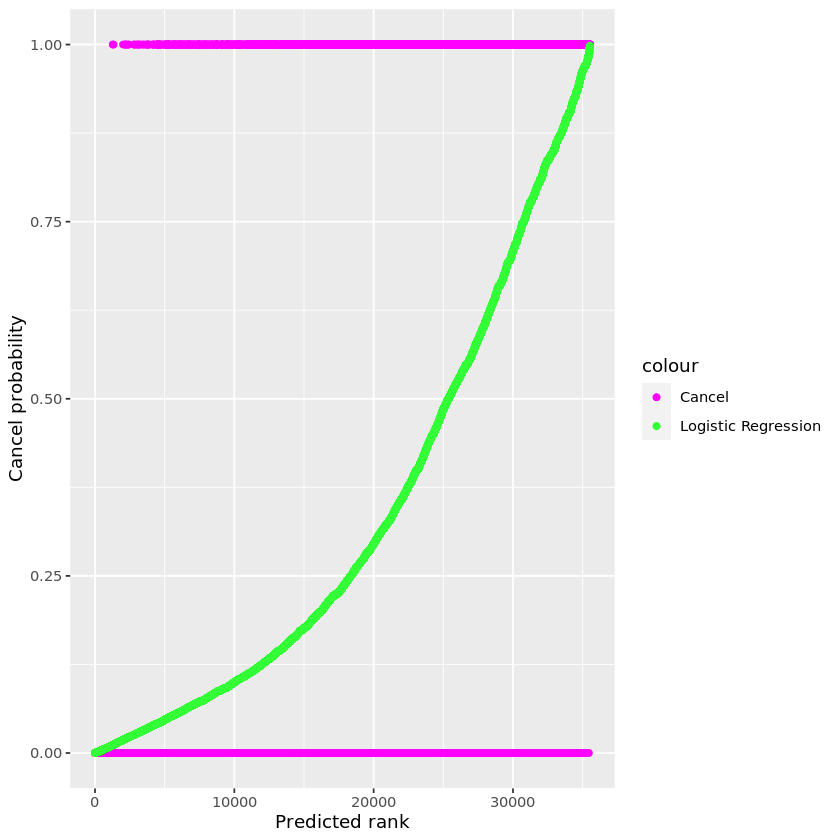

In [25]:
newdata$yhat5 = predict(reglog5, newdata, type = "response")
datarank5 = rank(newdata$yhat5)

ggplot(newdata) +
geom_point(aes(x = datarank5, y = booking_canceled, colour='Cancel')) +
geom_point(aes(x = datarank5, y = newdata$yhat5, colour='Logistic Regression')) +
scale_color_manual(values = c("Cancel" = '#ff00ff', 'Logistic Regression' = '#33ff36')) +
  xlab(label = 'Predicted rank') +
  ylab(label = 'Cancel probability')

sprintf("%0.f%%", 100*sum( (0.1 < newdata$yhat5) & (newdata$yhat5 < 0.9) ) / nrow(newdata))

In [26]:
#no esta la cor con roomtype
cor(booking_canceled, newdata$no_of_adults)
cor(booking_canceled, newdata$no_of_children)
cor(booking_canceled, newdata$no_of_weekend_nights)
cor(booking_canceled, newdata$no_of_week_nights)
cor(booking_canceled, mealselected)
cor(booking_canceled, newdata$required_car_parking_space)
cor(booking_canceled, newdata$lead_time)
cor(booking_canceled, newdata$arrival_month)
cor(booking_canceled, newdata$arrival_date)
cor(booking_canceled, newdata$repeated_guest)
cor(booking_canceled, newdata$no_of_previous_cancellations)
cor(booking_canceled, newdata$no_of_previous_bookings_not_canceled)
cor(booking_canceled, newdata$avg_price_per_room)
cor(booking_canceled, newdata$no_of_special_requests)

[1] 0.07898729

[1] 0.03475079

[1] 0.05375107

[1] 0.08429845

[1] -5.728259e-05

[1] -0.08597888

[1] 0.4359387

[1] -0.009976044

[1] 0.01029466

[1] -0.09961065

[1] -0.0306634

[1] -0.05425511

[1] 0.1184543

[1] -0.2562893

La mayor cor es con lead_time (aunque sea de 0.4), voy a hacer modelo solo con esa:

### Solo lead_time

In [27]:
reglog6 = glm(booking_canceled ~ newdata$lead_time, family=binomial)
summary(reglog6)


Call:
glm(formula = booking_canceled ~ newdata$lead_time, family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3616  -0.7639  -0.5915   0.9268   1.9691  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -1.7832155  0.0196175  -90.90   <2e-16 ***
newdata$lead_time  0.0116796  0.0001606   72.71   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 45222  on 35527  degrees of freedom
Residual deviance: 38414  on 35526  degrees of freedom
AIC: 38418

Number of Fisher Scoring iterations: 4


[1] "99%"

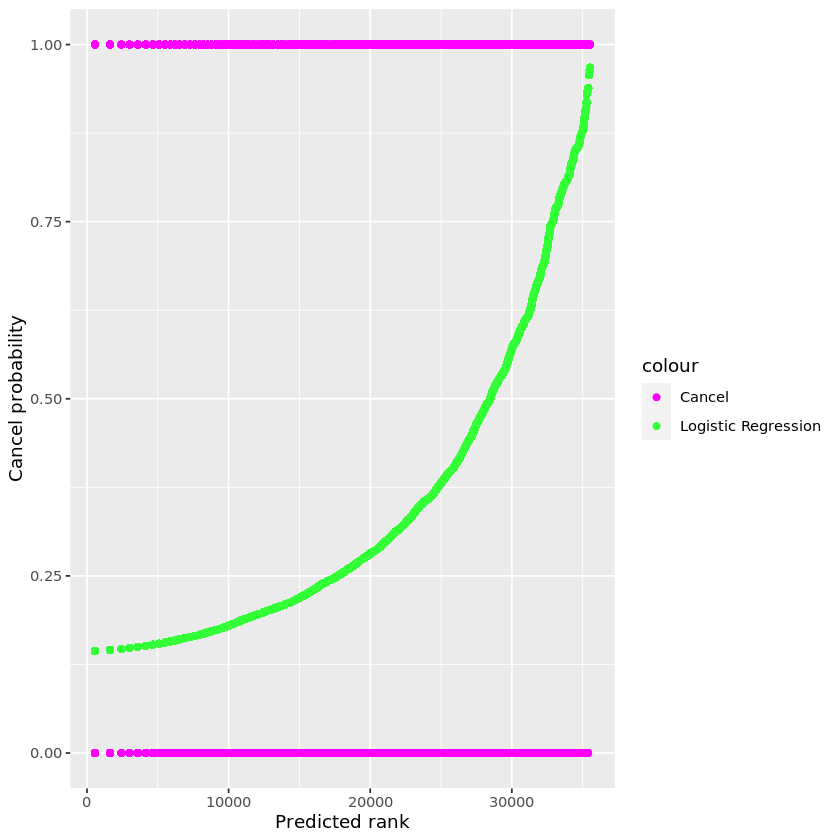

In [28]:
newdata$yhat6 = predict(reglog6, newdata, type = "response")
datarank6 = rank(newdata$yhat6)

ggplot(newdata) +
geom_point(aes(x = datarank6, y = booking_canceled, colour='Cancel')) +
geom_point(aes(x = datarank6, y = newdata$yhat6, colour='Logistic Regression')) +
scale_color_manual(values = c("Cancel" = '#ff00ff', 'Logistic Regression' = '#33ff36')) +
  xlab(label = 'Predicted rank') +
  ylab(label = 'Cancel probability')

sprintf("%0.f%%", 100*sum( (0.1 < newdata$yhat6) & (newdata$yhat6 < 0.9) ) / nrow(newdata))

Peor aún xdd

### Añadiendo precio y special requests

Estas dos pq son las siguientes más altas cors

In [29]:
reglog7 = glm(booking_canceled ~ newdata$lead_time + newdata$avg_price_per_room + newdata$no_of_special_requests, family=binomial)
summary(reglog7)


Call:
glm(formula = booking_canceled ~ newdata$lead_time + newdata$avg_price_per_room + 
    newdata$no_of_special_requests, family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8319  -0.7330  -0.4628   0.7265   2.7761  

Coefficients:
                                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    -3.3737405  0.0534242  -63.15   <2e-16 ***
newdata$lead_time               0.0129749  0.0001781   72.87   <2e-16 ***
newdata$avg_price_per_room      0.0188885  0.0004344   43.48   <2e-16 ***
newdata$no_of_special_requests -1.0393790  0.0211890  -49.05   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 45222  on 35527  degrees of freedom
Residual deviance: 34201  on 35524  degrees of freedom
AIC: 34209

Number of Fisher Scoring iterations: 5


[1] "79%"

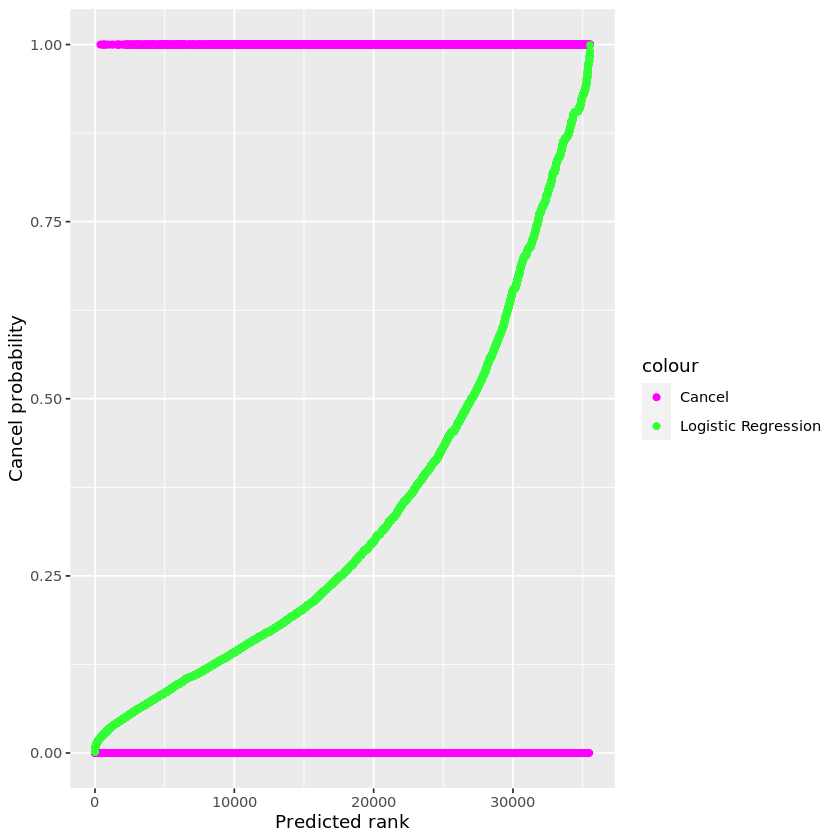

In [30]:
newdata$yhat7 = predict(reglog7, newdata, type = "response")
datarank7 = rank(newdata$yhat7)

ggplot(newdata) +
geom_point(aes(x = datarank7, y = booking_canceled, colour='Cancel')) +
geom_point(aes(x = datarank7, y = newdata$yhat7, colour='Logistic Regression')) +
scale_color_manual(values = c("Cancel" = '#ff00ff', 'Logistic Regression' = '#33ff36')) +
  xlab(label = 'Predicted rank') +
  ylab(label = 'Cancel probability')

sprintf("%0.f%%", 100*sum( (0.1 < newdata$yhat7) & (newdata$yhat7 < 0.9) ) / nrow(newdata))

In [31]:
(reglog7$null.deviance-reglog7$deviance)/reglog7$null.deviance

[1] 0.2436938

Es peor que los modelos con más variables. ¿Qué tal lo hace el modelo trivial?

###   Modelo trivial

In [32]:
reglog8 = glm(booking_canceled ~ 1, family=binomial)
summary(reglog8)


Call:
glm(formula = booking_canceled ~ 1, family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9003  -0.9003  -0.9003   1.4826   1.4826  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.69374    0.01126  -61.64   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 45222  on 35527  degrees of freedom
Residual deviance: 45222  on 35527  degrees of freedom
AIC: 45224

Number of Fisher Scoring iterations: 4


[1] "100%"

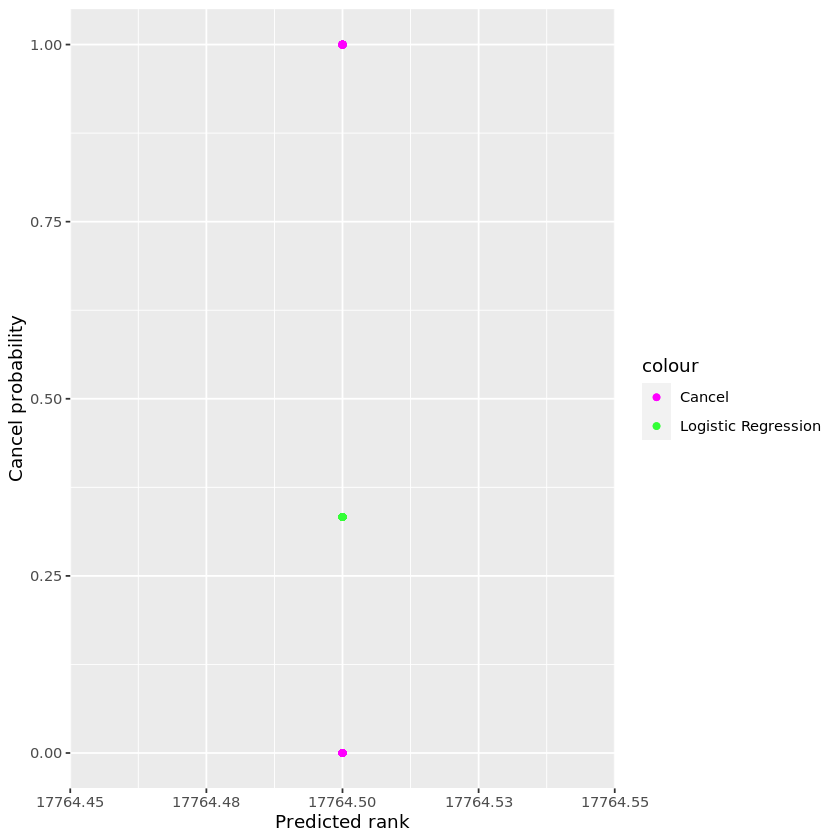

In [33]:
newdata$yhat8 = predict(reglog8, newdata, type = "response")
datarank8 = rank(newdata$yhat8)

ggplot(newdata) +
geom_point(aes(x = datarank8, y = booking_canceled, colour='Cancel')) +
geom_point(aes(x = datarank8, y = newdata$yhat8, colour='Logistic Regression')) +
scale_color_manual(values = c("Cancel" = '#ff00ff', 'Logistic Regression' = '#33ff36')) +
  xlab(label = 'Predicted rank') +
  ylab(label = 'Cancel probability')

sprintf("%0.f%%", 100*sum((0.1 < newdata$yhat8) & (newdata$yhat8 < 0.9)) / nrow(newdata))

## avg. price

### Modelo lineal con todas las variables.

In [34]:
reglin_todo <- lm(newdata$avg_price_per_room ~ newdata$no_of_adults + newdata$no_of_children +
                newdata$no_of_week_nights + newdata$no_of_weekend_nights + 
                mealselected + newdata$no_of_special_requests +
                newdata$required_car_parking_space + newdata$room_type_reserved +
                newdata$market_segment_type + as.factor(newdata$arrival_month) + newdata$lead_time)

summary(reglin_todo)
print(reglin_todo$null.deviance)


Call:
lm(formula = newdata$avg_price_per_room ~ newdata$no_of_adults + 
    newdata$no_of_children + newdata$no_of_week_nights + newdata$no_of_weekend_nights + 
    mealselected + newdata$no_of_special_requests + newdata$required_car_parking_space + 
    newdata$room_type_reserved + newdata$market_segment_type + 
    as.factor(newdata$arrival_month) + newdata$lead_time)

Residuals:
    Min      1Q  Median      3Q     Max 
-161.93  -13.54   -1.42   11.67  455.42 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                            41.51268    0.98343  42.212  < 2e-16 ***
newdata$no_of_adults                    8.51013    0.26439  32.187  < 2e-16 ***
newdata$no_of_children                 11.86176    0.41884  28.321  < 2e-16 ***
newdata$no_of_week_nights              -1.27202    0.08817 -14.426  < 2e-16 ***
newdata$no_of_weekend_nights           -2.94367    0.14017 -21.000  < 2e-16 ***
mealselected                         

NULL


In [35]:
deviance_lin = (reglin_todo$null.deviance - reglin_todo$deviance)/reglin_todo$null.deviance
print(deviance_lin)

numeric(0)


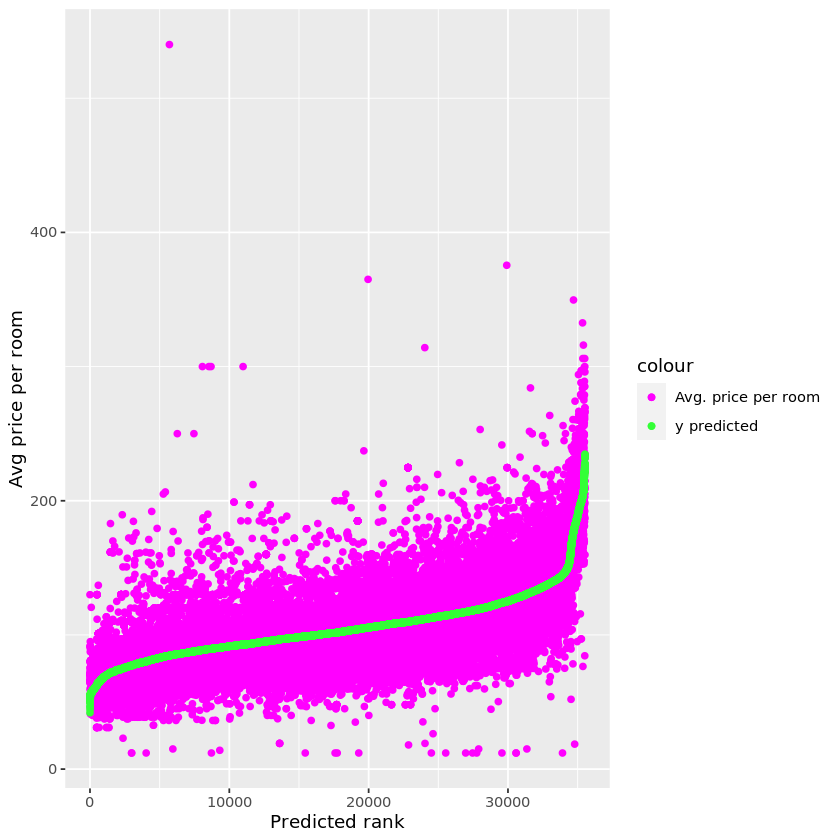

In [36]:
yhat_avgprice <- predict(reglin_todo, newdata, type = "response")
datarank = rank(yhat_avgprice)

ggplot(newdata) +
geom_point(aes(x = datarank, y = newdata$avg_price_per_room, colour='Avg. price per room')) +
geom_point(aes(x = datarank, y = yhat_avgprice, colour='y predicted')) +
scale_color_manual(values = c("Avg. price per room" = '#ff00ff', 'y predicted' = '#33ff36')) +
  xlab(label = 'Predicted rank') +
  ylab(label = 'Avg price per room')

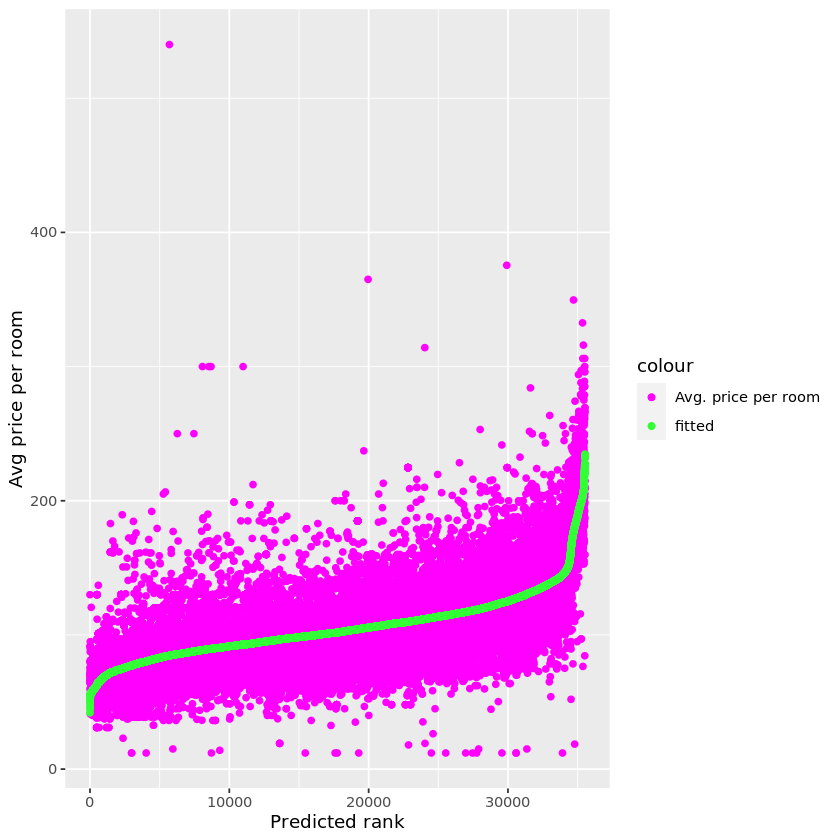

In [37]:
ggplot(newdata) +
geom_point(aes(x = datarank, y = newdata$avg_price_per_room, colour='Avg. price per room')) +
geom_point(aes(x = datarank, y = reglin_todo$fitted.values, colour='fitted')) +
scale_color_manual(values = c("Avg. price per room" = '#ff00ff', 'fitted' = '#33ff36')) +
  xlab(label = 'Predicted rank') +
  ylab(label = 'Avg price per room')

In [38]:
yhat_avgprice


1         2         3         4         5         6         7         8 
 89.23964  86.23148  79.24345 112.96509  92.56589 112.65120 112.71784 110.09251 
        9        10        11        12        13        14        15        16 
104.86695 131.96043 107.04563 112.12102  86.84991  90.03819 117.10685 114.29498 
       17        18        19        20        21        22        23        24 
 93.60289 103.21032 107.27604 101.55966 107.27604  68.59916  76.40151  99.53444 
       25        26        27        29        30        31        32        33 
100.97956 104.53672 108.17916  91.56680 110.03527 144.55485  94.67812  91.48167 
       34        35        36        37        38        39        40        41 
 81.20520  99.19250 105.05322 110.63384  90.45798  74.29932 124.26264 100.77708 
       42        43        44        45        46        47        48        49 
124.48597 108.56986 110.65948 102.96187  76.38381  79.52509  91.84899  88.44893 
       50        51        52        53        54        55        56        57 
105.85977  86.88524  94.64867 111.73727 103.14633 113.99546 114.64074 102.68064 
       58        59        60        61        62        63        65        66 
 92.81096 118.80151 121.62268 216.95463 131.34075  92.74735  75.80729 134.37726 
       67        68        69        70        71        72        73        74 
135.60419 124.88870  91.84899 102.74588  95.49536  92.42673 123.91327 117.16512 
       75        76        77        78        79        80        81        82 
111.54394 112.35462 111.88907 120.20502 136.29041  79.76065 184.05221 125.76856 
       83        84        85        86        87        88        89        90 
 85.00615 110.56734 121.22553 110.31830 100.53064 108.14775  88.21423 131.97066 
       91        92        93        94        95        96        97        98 
102.30146 101.67974 118.87885 138.25587 100.98874 133.42371 104.59409 101.11653 
       99       100       101       102       103       104       105       106 
102.84416 173.55567  98.28101 145.02928  87.55948 119.03559 116.12264  75.55814 
      107       108       109       110       111       112       113       114 
106.39597 142.14915 114.94044 124.06097 120.98654 113.77603 108.09674 117.09604 
      115       116       117       118       119       120       121       122 
126.84266 141.67770 123.04983 104.36162  89.17305  98.24798 112.71646  99.42925 
      123       124       125       126       127       128       129       130 
 92.78968 114.59820 129.66435  83.54173  97.61589 192.20662  89.04647 128.04767 
      131       132       133       134       135       136       137       138 
107.34990 106.66754  67.51364 113.49227  73.51970 137.79746 124.46109 110.02178 
      139       140       141       142       143       144       145       147 
104.51621 124.92132  95.42574 114.02943 104.99233 101.12074  98.71582 103.88088 
      148       149       150       151       152       153       154       155 
 90.22214 108.80088 115.56201 118.10705 139.87091  89.82627 106.33483  91.84899 
      156       157       158       159       160       161       162       163 
 72.26925 134.70848  73.89807  96.29349 113.04935  97.52600 117.00736 205.53654 
      164       165       167       168       169       170       171       172 
 96.71620 113.87511 142.71674  96.38998 111.97820 127.68306 113.21569  76.25153 
      173       174       175       176       177       178       179       180 
114.50614 111.16157 118.12611  89.44271 101.33883 106.46453  97.79247 105.45868 
      181       182       183       184       185       186       187       188 
126.82707  92.73244 102.09613 121.86863 102.77959 138.64392  90.43048 125.03804 
      189       190       191       192       193       194       195       196 
 97.44586 105.12545 112.29481 109.79879 101.81936  89.77319 108.37930 100.29293 
      197       198       199       200       201       202       203       204 
101.83000  75.28347  78.07030 105.61459

In [39]:
reglin_todo$fitted.values - yhat_avgprice


1             2             3             4             5 
 2.975753e-11  6.295409e-12  4.888534e-12  2.557954e-13  2.842171e-13 
            6             7             8             9            10 
 4.121148e-13  7.105427e-13  3.979039e-13  2.842171e-13 -5.684342e-14 
           11            12            13            14            15 
-1.278977e-13  4.547474e-13 -1.563194e-13  1.335820e-12  7.389644e-13 
           16            17            18            19            20 
 4.547474e-13 -2.842171e-14  3.836931e-13 -1.421085e-14  1.136868e-13 
           21            22            23            24            25 
 2.415845e-13  2.273737e-13 -9.947598e-14  4.263256e-14  3.552714e-13 
           26            27            28            29            30 
 1.989520e-13  1.989520e-13  1.421085e-13  1.847411e-13  2.273737e-13 
           31            32            33            34            35 
 1.989520e-13 -4.263256e-14  1.847411e-13  1.563194e-13  1.847411e-13 
           36            37            38            39            40 
 1.563194e-13  1.989520e-13  1.847411e-13  1.989520e-13  1.989520e-13 
           41            42            43            44            45 
 1.989520e-13  2.557954e-13  1.847411e-13  1.563194e-13  1.705303e-13 
           46            47            48            49            50 
 1.136868e-13  1.705303e-13  1.847411e-13  1.278977e-13  1.278977e-13 
           51            52            53            54            55 
 1.847411e-13  1.278977e-13  1.563194e-13  1.989520e-13  2.131628e-13 
           56            57            58            59            60 
 1.847411e-13  2.131628e-13  1.989520e-13  1.989520e-13  8.526513e-14 
           61            62            63            64            65 
 1.421085e-13  1.136868e-13  1.705303e-13  1.989520e-13  1.989520e-13 
           66            67            68            69            70 
 1.847411e-13  1.705303e-13  1.989520e-13  1.847411e-13  1.989520e-13 
           71            72            73            74            75 
 1.847411e-13  1.989520e-13  1.705303e-13  1.847411e-13  2.557954e-13 
           76            77            78            79            80 
 1.989520e-13  2.557954e-13  1.563194e-13  5.684342e-14  1.847411e-13 
           81            82            83            84            85 
 1.989520e-13  1.847411e-13  1.847411e-13  1.563194e-13  1.989520e-13 
           86            87            88            89            90 
 1.563194e-13  1.847411e-13  1.989520e-13  1.847411e-13  1.989520e-13 
           91            92            93            94            95 
 1.847411e-13  1.989520e-13  1.847411e-13  1.136868e-13  1.989520e-13 
           96            97            98            99           100 
 1.847411e-13  1.847411e-13  8.526513e-14  1.847411e-13  2.557954e-13 
          101           102           103           104           105 
 1.421085e-13  1.847411e-13  2.131628e-13  1.563194e-13  1.847411e-13 
          106           107           108           109           110 
 1.989520e-13  1.847411e-13  1.989520e-13  1.989520e-13  1.847411e-13 
          111           112           113           114           115 
 1.989520e-13  1.847411e-13  4.263256e-14  2.557954e-13  2.700062e-13 
          116           117           118           119           120 
 1.421085e-13  2.131628e-13  1.989520e-13  1.989520e-13  1.989520e-13 
          121           122           123           124           125 
 1.989520e-13  1.989520e-13  2.842171e-13  1.705303e-13  1.421085e-13 
          126           127           128           129           130 
 8.526513e-14  1.278977e-13  2.273737e-13  1.847411e-13  1.563194e-13 
          131           132           133           134           135 
 1.989520e-13  1.705303e-13  1.278977e-13  1.989520e-13  1.421085e-13 
          136           137           138           139           140 
 1.989520e-13  1.278977e-13  2.415845e-13  1.278977e-13  1.989520e-13 
          141           142         

In [40]:
#plot(reglin_todo)

### Modelo Gamma.

In [41]:
reggam_todo <- glm(newdata$avg_price_per_room ~ newdata$no_of_adults + newdata$no_of_children +
                newdata$no_of_week_nights + newdata$no_of_weekend_nights + 
                mealselected + newdata$no_of_special_requests +
                newdata$required_car_parking_space + newdata$room_type_reserved +
                newdata$market_segment_type + as.factor(newdata$arrival_month) + newdata$lead_time,
                family='Gamma')

summary(reggam_todo)


Call:
glm(formula = newdata$avg_price_per_room ~ newdata$no_of_adults + 
    newdata$no_of_children + newdata$no_of_week_nights + newdata$no_of_weekend_nights + 
    mealselected + newdata$no_of_special_requests + newdata$required_car_parking_space + 
    newdata$room_type_reserved + newdata$market_segment_type + 
    as.factor(newdata$arrival_month) + newdata$lead_time, family = "Gamma")

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.80347  -0.14315  -0.01552   0.10864   2.62940  

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            1.657e-02  1.130e-04 146.595  < 2e-16
newdata$no_of_adults                  -7.165e-04  2.373e-05 -30.199  < 2e-16
newdata$no_of_children                -7.303e-04  2.765e-05 -26.411  < 2e-16
newdata$no_of_week_nights              9.978e-05  8.099e-06  12.320  < 2e-16
newdata$no_of_weekend_nights           2.455e-04  1.267e-05  19.376  < 2e-16
mealse

In [42]:
deviance_gam = (reggam_todo$null.deviance - reggam_todo$deviance)/reggam_todo$null.deviance
print(deviance_gam)

[1] 0.501787


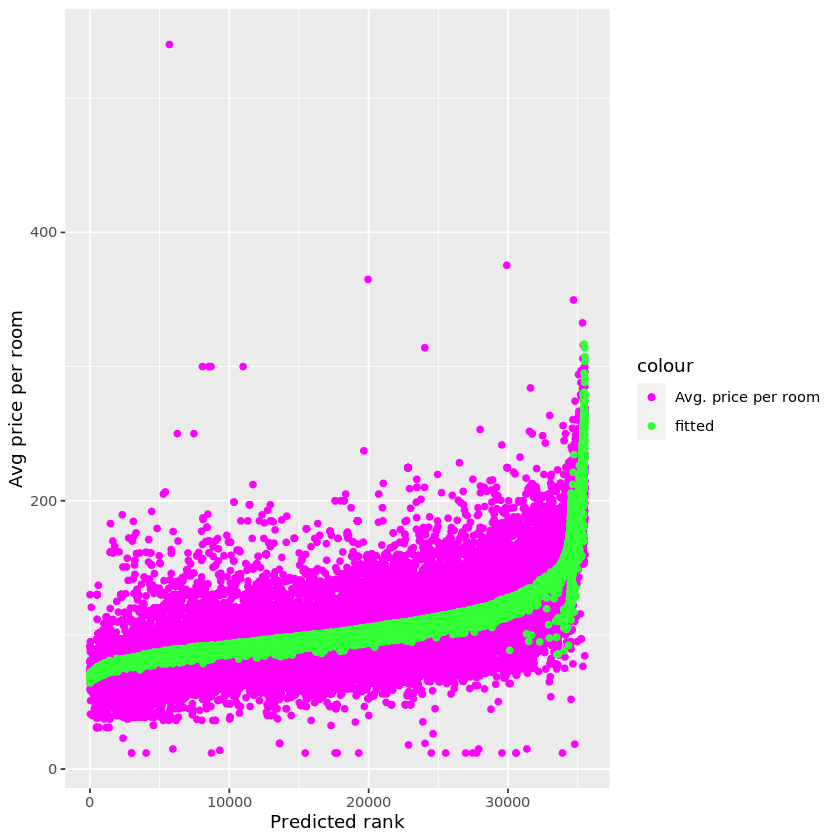

In [43]:
ggplot(newdata) +
geom_point(aes(x = datarank, y = newdata$avg_price_per_room, colour='Avg. price per room')) +
geom_point(aes(x = datarank, y = reggam_todo$fitted.values, colour='fitted')) +
scale_color_manual(values = c("Avg. price per room" = '#ff00ff', 'fitted' = '#33ff36')) +
  xlab(label = 'Predicted rank') +
  ylab(label = 'Avg price per room')

In [44]:
#plot(reggam_todo)

### Según el mes del año.

In [45]:
regglm1 <- glm(newdata$avg_price_per_room ~ newdata$room_type_reserved + as.factor(newdata$arrival_month))
summary(regglm1)


Call:
glm(formula = newdata$avg_price_per_room ~ newdata$room_type_reserved + 
    as.factor(newdata$arrival_month))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-167.19   -15.56    -1.40    12.96   454.08  

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                            74.7777     0.8022  93.213   <2e-16 ***
newdata$room_type_reservedRoom_Type 2  -1.5306     0.9875  -1.550   0.1211    
newdata$room_type_reservedRoom_Type 4  28.4249     0.3580  79.397   <2e-16 ***
newdata$room_type_reservedRoom_Type 5  34.5977     1.5999  21.624   <2e-16 ***
newdata$room_type_reservedRoom_Type 6  86.5864     0.8244 105.028   <2e-16 ***
newdata$room_type_reservedRoom_Type 7 109.4601     2.3105  47.376   <2e-16 ***
as.factor(newdata$arrival_month)2       1.8976     1.0066   1.885   0.0594 .  
as.factor(newdata$arrival_month)3      11.1407     0.9536  11.682   <2e-16 ***
as.factor(newdata$arrival_month)4      18.

In [46]:
regglm1_gamma <- glm(newdata$avg_price_per_room ~ newdata$room_type_reserved + as.factor(newdata$arrival_month),
                family='Gamma')
summary(regglm1_gamma)


Call:
glm(formula = newdata$avg_price_per_room ~ newdata$room_type_reserved + 
    as.factor(newdata$arrival_month), family = "Gamma")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7091  -0.1659  -0.0144   0.1214   2.5843  

Coefficients:
                                        Estimate Std. Error  t value Pr(>|t|)
(Intercept)                            1.311e-02  9.847e-05  133.084  < 2e-16
newdata$room_type_reservedRoom_Type 2  2.162e-04  1.017e-04    2.125 0.033587
newdata$room_type_reservedRoom_Type 4 -2.267e-03  2.864e-05  -79.144  < 2e-16
newdata$room_type_reservedRoom_Type 5 -2.617e-03  1.150e-04  -22.755  < 2e-16
newdata$room_type_reservedRoom_Type 6 -4.680e-03  4.433e-05 -105.580  < 2e-16
newdata$room_type_reservedRoom_Type 7 -5.194e-03  1.059e-04  -49.029  < 2e-16
as.factor(newdata$arrival_month)2     -4.573e-04  1.212e-04   -3.773 0.000161
as.factor(newdata$arrival_month)3     -1.703e-03  1.118e-04  -15.235  < 2e-16
as.factor(newdata$arrival_month)4

In [47]:
deviance1 = (regglm1$null.deviance - regglm1$deviance)/regglm1$null.deviance
print(deviance1)

[1] 0.4214789


In [48]:
deviance1_gamma = (regglm1_gamma$null.deviance - regglm1_gamma$deviance)/regglm1_gamma$null.deviance
print(deviance1_gamma)

[1] 0.3799652


In [49]:
# añadiendo mealselect

regglm2 <- glm(newdata$avg_price_per_room ~ newdata$room_type_reserved + as.factor(newdata$arrival_month)
                + mealselected)
summary(regglm2)


Call:
glm(formula = newdata$avg_price_per_room ~ newdata$room_type_reserved + 
    as.factor(newdata$arrival_month) + mealselected)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-167.16   -15.70    -1.40    12.68   453.69  

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                            73.2040     0.8649  84.643  < 2e-16 ***
newdata$room_type_reservedRoom_Type 2  -1.8192     0.9889  -1.840   0.0658 .  
newdata$room_type_reservedRoom_Type 4  28.0928     0.3644  77.103  < 2e-16 ***
newdata$room_type_reservedRoom_Type 5  34.3284     1.6004  21.450  < 2e-16 ***
newdata$room_type_reservedRoom_Type 6  86.2842     0.8265 104.399  < 2e-16 ***
newdata$room_type_reservedRoom_Type 7 109.1157     2.3108  47.220  < 2e-16 ***
as.factor(newdata$arrival_month)2       1.9498     1.0064   1.937   0.0527 .  
as.factor(newdata$arrival_month)3      11.2340     0.9535  11.781  < 2e-16 ***
as.factor(newdata$arrival_m

## División por Room Type.

In [50]:
# Type 1
ind.Room1 <-newdata[ which(newdata$room_type_reserved == 'Room_Type 1'), ]

ind.Room1$booking_status <- ifelse(ind.Room1$booking_status == 'Not_Canceled', 0, 1)
ind.Room1$type_of_meal_plan <- ifelse(ind.Room1$type_of_meal_plan == 'Not Selected', 0, 1)

length(ind.Room1[,1])
# Type 2
ind.Room2 <-newdata[ which(newdata$room_type_reserved == 'Room_Type 2'), ]

ind.Room2$booking_status <- ifelse(ind.Room2$booking_status == 'Not_Canceled', 0, 1)
ind.Room2$type_of_meal_plan <- ifelse(ind.Room2$type_of_meal_plan == 'Not Selected', 0, 1)

length(ind.Room2[,1])
# Type 4
ind.Room4 <-newdata[ which(newdata$room_type_reserved == 'Room_Type 4'), ]

ind.Room4$booking_status <- ifelse(ind.Room4$booking_status == 'Not_Canceled', 0, 1)
ind.Room4$type_of_meal_plan <- ifelse(ind.Room4$type_of_meal_plan == 'Not Selected', 0, 1)

length(ind.Room4[,1])
# Type 5
ind.Room5 <-newdata[ which(newdata$room_type_reserved == 'Room_Type 5'), ]

ind.Room5$booking_status <- ifelse(ind.Room5$booking_status == 'Not_Canceled', 0, 1)
ind.Room5$type_of_meal_plan <- ifelse(ind.Room5$type_of_meal_plan == 'Not Selected', 0, 1)

length(ind.Room5[,1])
# Type 6
ind.Room6 <-newdata[ which(newdata$room_type_reserved == 'Room_Type 6'), ]

ind.Room6$booking_status <- ifelse(ind.Room6$booking_status == 'Not_Canceled', 0, 1)
ind.Room6$type_of_meal_plan <- ifelse(ind.Room6$type_of_meal_plan == 'Not Selected', 0, 1)

length(ind.Room6[,1])
# Type 7
ind.Room7 <-newdata[ which(newdata$room_type_reserved == 'Room_Type 7'), ]

ind.Room7$booking_status <- ifelse(ind.Room7$booking_status == 'Not_Canceled', 0, 1)
ind.Room7$type_of_meal_plan <- ifelse(ind.Room7$type_of_meal_plan == 'Not Selected', 0, 1)

length(ind.Room7[,1])

[1] 27634

[1] 655

[1] 5928

[1] 245

[1] 949

[1] 117

### Modelo logístico (cancelaciones).

Es interesante hacer la logistica según el tipo de habitación porque claramente existen diferencias entre los precios medios de las habitaciones (anova arriba) y te fastidia más perder la habitación cara.

In [51]:
reglog_type1 = glm(booking_status ~ no_of_adults + no_of_children + repeated_guest +
                no_of_previous_bookings_not_canceled + no_of_previous_cancellations + 
                avg_price_per_room + no_of_week_nights + no_of_weekend_nights + 
                type_of_meal_plan + no_of_special_requests +
                required_car_parking_space + market_segment_type +
                as.factor(arrival_month) + lead_time +
                arrival_date, data=ind.Room1, family=binomial)
summary(reglog_type1)


Call:
glm(formula = booking_status ~ no_of_adults + no_of_children + 
    repeated_guest + no_of_previous_bookings_not_canceled + no_of_previous_cancellations + 
    avg_price_per_room + no_of_week_nights + no_of_weekend_nights + 
    type_of_meal_plan + no_of_special_requests + required_car_parking_space + 
    market_segment_type + as.factor(arrival_month) + lead_time + 
    arrival_date, family = binomial, data = ind.Room1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6711  -0.6360  -0.3096   0.5607   3.0573  

Coefficients:
                                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)                          -6.4489337  0.2803586 -23.002  < 2e-16 ***
no_of_adults                          0.1679195  0.0401968   4.177 2.95e-05 ***
no_of_children                        0.1142640  0.0731505   1.562 0.118279    
repeated_guest                       -2.2569090  0.5056206  -4.464 8.06e-06 ***
no_of_previous_bookings_not_canceled -0

In [52]:
logdeviance.type1 = (reglog_type1$null.deviance - reglog_type1$deviance)/reglog_type1$null.deviance
print(logdeviance.type1)

[1] 0.345632


In [53]:
modback1 = step(reglog_type1, direction = 'backward')

Start:  AIC=22923.85
booking_status ~ no_of_adults + no_of_children + repeated_guest + 
    no_of_previous_bookings_not_canceled + no_of_previous_cancellations + 
    avg_price_per_room + no_of_week_nights + no_of_weekend_nights + 
    type_of_meal_plan + no_of_special_requests + required_car_parking_space + 
    market_segment_type + as.factor(arrival_month) + lead_time + 
    arrival_date

                                       Df Deviance   AIC
- no_of_previous_bookings_not_canceled  1    22871 22923
- no_of_week_nights                     1    22872 22924
<none>                                       22870 22924
- no_of_children                        1    22872 22924
- arrival_date                          1    22880 22932
- no_of_previous_cancellations          1    22885 22937
- no_of_adults                          1    22887 22939
- repeated_guest                        1    22900 22952
- type_of_meal_plan                     1    22916 22968
- no_of_weekend_nights             

In [54]:
summary(modback1)


Call:
glm(formula = booking_status ~ no_of_adults + no_of_children + 
    repeated_guest + no_of_previous_cancellations + avg_price_per_room + 
    no_of_weekend_nights + type_of_meal_plan + no_of_special_requests + 
    required_car_parking_space + market_segment_type + as.factor(arrival_month) + 
    lead_time + arrival_date, family = binomial, data = ind.Room1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6878  -0.6373  -0.3090   0.5608   3.1132  

Coefficients:
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  -6.4228380  0.2791219 -23.011  < 2e-16 ***
no_of_adults                  0.1700070  0.0401699   4.232 2.31e-05 ***
no_of_children                0.1147875  0.0731173   1.570 0.116437    
repeated_guest               -2.4525570  0.4791260  -5.119 3.07e-07 ***
no_of_previous_cancellations  0.3007838  0.0838091   3.589 0.000332 ***
avg_price_per_room            0.0207603  0.0007962  26.074  < 2e-16 ***

In [55]:
logdeviance.type1_step = (modback1$null.deviance - modback1$deviance)/modback1$null.deviance
print(logdeviance.type1_step)

[1] 0.3455469


In [56]:
reglog_type2 = glm(booking_status ~ no_of_adults + no_of_children + repeated_guest +
                no_of_previous_bookings_not_canceled + no_of_previous_cancellations + 
                avg_price_per_room + no_of_week_nights + no_of_weekend_nights + 
                type_of_meal_plan + no_of_special_requests +
                required_car_parking_space + market_segment_type +
                as.factor(arrival_month) + lead_time +
                arrival_date, data=ind.Room2, family=binomial)
summary(reglog_type2)


Call:
glm(formula = booking_status ~ no_of_adults + no_of_children + 
    repeated_guest + no_of_previous_bookings_not_canceled + no_of_previous_cancellations + 
    avg_price_per_room + no_of_week_nights + no_of_weekend_nights + 
    type_of_meal_plan + no_of_special_requests + required_car_parking_space + 
    market_segment_type + as.factor(arrival_month) + lead_time + 
    arrival_date, family = binomial, data = ind.Room2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5991  -0.5584  -0.2297   0.5449   3.0268  

Coefficients: (2 not defined because of singularities)
                                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)                          -1.418e+01  8.827e+02  -0.016  0.98718    
no_of_adults                          2.246e-01  2.037e-01   1.103  0.27023    
no_of_children                        4.842e-01  1.741e-01   2.781  0.00541 ** 
repeated_guest                       -1.722e+00  1.248e+03  -0.001  0.99890   

In [57]:
logdeviance.type2 = (reglog_type2$null.deviance - reglog_type2$deviance)/reglog_type2$null.deviance
print(logdeviance.type2)

[1] 0.4054959


In [58]:
step(reglog_type2, direction = 'both')

Start:  AIC=553.31
booking_status ~ no_of_adults + no_of_children + repeated_guest + 
    no_of_previous_bookings_not_canceled + no_of_previous_cancellations + 
    avg_price_per_room + no_of_week_nights + no_of_weekend_nights + 
    type_of_meal_plan + no_of_special_requests + required_car_parking_space + 
    market_segment_type + as.factor(arrival_month) + lead_time + 
    arrival_date


Step:  AIC=553.31
booking_status ~ no_of_adults + no_of_children + repeated_guest + 
    no_of_previous_bookings_not_canceled + avg_price_per_room + 
    no_of_week_nights + no_of_weekend_nights + type_of_meal_plan + 
    no_of_special_requests + required_car_parking_space + market_segment_type + 
    as.factor(arrival_month) + lead_time + arrival_date


Step:  AIC=553.31
booking_status ~ no_of_adults + no_of_children + repeated_guest + 
    avg_price_per_room + no_of_week_nights + no_of_weekend_nights + 
    type_of_meal_plan + no_of_special_requests + required_car_parking_space + 
    market_segme


Call:  glm(formula = booking_status ~ no_of_children + avg_price_per_room + 
    no_of_week_nights + no_of_weekend_nights + type_of_meal_plan + 
    no_of_special_requests + market_segment_type + as.factor(arrival_month) + 
    lead_time + arrival_date, family = binomial, data = ind.Room2)

Coefficients:
               (Intercept)              no_of_children  
                 -14.65882                     0.35138  
        avg_price_per_room           no_of_week_nights  
                   0.01771                     0.38192  
      no_of_weekend_nights           type_of_meal_plan  
                  -0.31894                    -1.21263  
    no_of_special_requests  market_segment_typeOffline  
                  -1.56241                    10.19302  
 market_segment_typeOnline   as.factor(arrival_month)2  
                  11.81512                     1.44616  
 as.factor(arrival_month)3   as.factor(arrival_month)4  
                   1.61028                    -0.32137  
 as.facto

In [59]:
reglog_type4 = glm(booking_status ~ no_of_adults + no_of_children + repeated_guest +
                no_of_previous_bookings_not_canceled + no_of_previous_cancellations + 
                avg_price_per_room + no_of_week_nights + no_of_weekend_nights + 
                type_of_meal_plan + no_of_special_requests +
                required_car_parking_space + market_segment_type +
                as.factor(arrival_month) + lead_time +
                arrival_date, data=ind.Room4, family=binomial)
summary(reglog_type4)


Call:
glm(formula = booking_status ~ no_of_adults + no_of_children + 
    repeated_guest + no_of_previous_bookings_not_canceled + no_of_previous_cancellations + 
    avg_price_per_room + no_of_week_nights + no_of_weekend_nights + 
    type_of_meal_plan + no_of_special_requests + required_car_parking_space + 
    market_segment_type + as.factor(arrival_month) + lead_time + 
    arrival_date, family = binomial, data = ind.Room4)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3887  -0.6704  -0.2737   0.7336   3.1325  

Coefficients:
                                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)                          -19.752105 333.415381  -0.059  0.95276    
no_of_adults                           0.042534   0.070863   0.600  0.54835    
no_of_children                         0.080979   0.178399   0.454  0.64988    
repeated_guest                       -14.428328 436.986930  -0.033  0.97366    
no_of_previous_bookings_not_canceled   

In [60]:
logdeviance.type4 = (reglog_type4$null.deviance - reglog_type4$deviance)/reglog_type4$null.deviance
print(logdeviance.type4)

[1] 0.3335224


In [61]:
reglog_type5 = glm(booking_status ~ no_of_adults + no_of_children + repeated_guest +
                no_of_previous_bookings_not_canceled + no_of_previous_cancellations + 
                avg_price_per_room + no_of_week_nights + no_of_weekend_nights + 
                type_of_meal_plan + no_of_special_requests +
                required_car_parking_space + market_segment_type +
                as.factor(arrival_month) + lead_time +
                arrival_date, data=ind.Room5, family=binomial)
summary(reglog_type5)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = booking_status ~ no_of_adults + no_of_children + 
    repeated_guest + no_of_previous_bookings_not_canceled + no_of_previous_cancellations + 
    avg_price_per_room + no_of_week_nights + no_of_weekend_nights + 
    type_of_meal_plan + no_of_special_requests + required_car_parking_space + 
    market_segment_type + as.factor(arrival_month) + lead_time + 
    arrival_date, family = binomial, data = ind.Room5)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.47859  -0.50689  -0.10611   0.07171   2.83447  

Coefficients:
                                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)                          -2.673e+01  7.570e+03  -0.004  0.99718    
no_of_adults                         -3.219e-01  4.496e-01  -0.716  0.47396    
no_of_children                       -4.521e-01  5.193e-01  -0.871  0.38398    
repeated_guest                       -1.312e+01  3.011e+03  -0.004  0.99652    
no_of_previous_bookings_not_c

In [62]:
logdeviance.type5 = (reglog_type5$null.deviance - reglog_type5$deviance)/reglog_type5$null.deviance
print(logdeviance.type5)

[1] 0.5291061


In [63]:
reglog_type6 = glm(booking_status ~ no_of_adults + no_of_children + repeated_guest +
                no_of_previous_bookings_not_canceled + no_of_previous_cancellations + 
                avg_price_per_room + no_of_week_nights + no_of_weekend_nights + 
                type_of_meal_plan + no_of_special_requests +
                required_car_parking_space + market_segment_type +
                as.factor(arrival_month) + lead_time +
                arrival_date, data=ind.Room6, family=binomial)
summary(reglog_type6)


Call:
glm(formula = booking_status ~ no_of_adults + no_of_children + 
    repeated_guest + no_of_previous_bookings_not_canceled + no_of_previous_cancellations + 
    avg_price_per_room + no_of_week_nights + no_of_weekend_nights + 
    type_of_meal_plan + no_of_special_requests + required_car_parking_space + 
    market_segment_type + as.factor(arrival_month) + lead_time + 
    arrival_date, family = binomial, data = ind.Room6)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1829  -0.5169  -0.1315   0.5218   2.7698  

Coefficients: (2 not defined because of singularities)
                                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)                          -3.468e+01  1.398e+03  -0.025 0.980206    
no_of_adults                         -1.820e-02  3.492e-01  -0.052 0.958435    
no_of_children                        4.062e-01  1.686e-01   2.409 0.015976 *  
repeated_guest                       -1.342e+01  1.323e+03  -0.010 0.991906   

In [64]:
logdeviance.type6 = (reglog_type6$null.deviance - reglog_type6$deviance)/reglog_type6$null.deviance
print(logdeviance.type6)

[1] 0.4649796


In [65]:
reglog_type7 = glm(booking_status ~ no_of_adults + no_of_children + repeated_guest +
                no_of_previous_bookings_not_canceled + no_of_previous_cancellations + 
                avg_price_per_room + no_of_week_nights + no_of_weekend_nights + 
                type_of_meal_plan + no_of_special_requests +
                required_car_parking_space + market_segment_type +
                as.factor(arrival_month) + lead_time, 
                data=ind.Room7, family=binomial)
summary(reglog_type7)


Call:
glm(formula = booking_status ~ no_of_adults + no_of_children + 
    repeated_guest + no_of_previous_bookings_not_canceled + no_of_previous_cancellations + 
    avg_price_per_room + no_of_week_nights + no_of_weekend_nights + 
    type_of_meal_plan + no_of_special_requests + required_car_parking_space + 
    market_segment_type + as.factor(arrival_month) + lead_time, 
    family = binomial, data = ind.Room7)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8189  -0.2645  -0.0460   0.0511   3.6866  

Coefficients: (3 not defined because of singularities)
                                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)                          -2.544e+01  3.133e+03  -0.008  0.99352    
no_of_adults                         -3.654e-01  7.984e-01  -0.458  0.64719    
no_of_children                       -4.036e-01  6.613e-01  -0.610  0.54165    
repeated_guest                       -1.008e+01  1.172e+04  -0.001  0.99931    
no_of_previou

In [66]:
logdeviance.type7 = (reglog_type7$null.deviance - reglog_type7$deviance)/reglog_type7$null.deviance
print(logdeviance.type7)


[1] 0.7083002


In [67]:
gl7 = step(reglog_type7, direction='both')

Start:  AIC=86.13
booking_status ~ no_of_adults + no_of_children + repeated_guest + 
    no_of_previous_bookings_not_canceled + no_of_previous_cancellations + 
    avg_price_per_room + no_of_week_nights + no_of_weekend_nights + 
    type_of_meal_plan + no_of_special_requests + required_car_parking_space + 
    market_segment_type + as.factor(arrival_month) + lead_time


Step:  AIC=86.13
booking_status ~ no_of_adults + no_of_children + repeated_guest + 
    no_of_previous_bookings_not_canceled + no_of_previous_cancellations + 
    avg_price_per_room + no_of_week_nights + no_of_weekend_nights + 
    no_of_special_requests + required_car_parking_space + market_segment_type + 
    as.factor(arrival_month) + lead_time


Step:  AIC=86.13
booking_status ~ no_of_adults + no_of_children + repeated_guest + 
    no_of_previous_bookings_not_canceled + avg_price_per_room + 
    no_of_week_nights + no_of_weekend_nights + no_of_special_requests + 
    required_car_parking_space + market_segment_type 

In [68]:
summary(gl7)


Call:
glm(formula = booking_status ~ avg_price_per_room + no_of_week_nights + 
    no_of_special_requests + market_segment_type + lead_time, 
    family = binomial, data = ind.Room7)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0135  -0.3606  -0.0957   0.1198   3.4222  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -22.06624 1644.65452  -0.013 0.989295    
avg_price_per_room            0.02930    0.01042   2.812 0.004919 ** 
no_of_week_nights             0.45669    0.27007   1.691 0.090833 .  
no_of_special_requests       -3.33789    0.70559  -4.731 2.24e-06 ***
market_segment_typeOffline    9.38629 1644.65539   0.006 0.995446    
market_segment_typeOnline    15.05454 1644.65426   0.009 0.992697    
lead_time                     0.04001    0.01076   3.718 0.000201 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

 

In [69]:
(gl7$null.deviance -gl7$deviance)/gl7$null.deviance

[1] 0.5952145

In [70]:
reglog_type7.new = glm(booking_status ~
                avg_price_per_room +
                 no_of_special_requests +
                lead_time, 
                 data=ind.Room7, family=binomial)
summary(reglog_type7.new)


Call:
glm(formula = booking_status ~ avg_price_per_room + no_of_special_requests + 
    lead_time, family = binomial, data = ind.Room7)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0297  -0.4457  -0.1745   0.2144   3.4026  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -7.262743   2.104703  -3.451 0.000559 ***
avg_price_per_room      0.034746   0.009873   3.519 0.000433 ***
no_of_special_requests -2.592419   0.546963  -4.740 2.14e-06 ***
lead_time               0.029677   0.007826   3.792 0.000149 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 144.435  on 116  degrees of freedom
Residual deviance:  69.893  on 113  degrees of freedom
AIC: 77.893

Number of Fisher Scoring iterations: 6


In [71]:
logdeviance.type7.new = (reglog_type7.new$null.deviance - reglog_type7.new$deviance)/reglog_type7.new$null.deviance
print(logdeviance.type7.new)

[1] 0.5160941


### Modelos Lineal y Gamma (avg_price).

El interés de realizar la distinción según el tipo de habitación es para comprobar si se puede conseguir un modelo de regresión con un mejor ajuste para que en el supuesto de que si un cliente quiere alquilar la habitación del tipo $x$ entonces compruebe con sus datos cuál es el precio estimado que le va a costar.



In [72]:
reglin.type1 <- lm(avg_price_per_room ~ no_of_adults + no_of_children +
                no_of_week_nights + no_of_weekend_nights + 
                type_of_meal_plan + no_of_special_requests +
                required_car_parking_space + market_segment_type + 
                as.factor(arrival_month) + lead_time , 
                data = ind.Room1)

# +no_of_weekend_nights*as.factor(arrival_month)


summary(reglin.type1)


Call:
lm(formula = avg_price_per_room ~ no_of_adults + no_of_children + 
    no_of_week_nights + no_of_weekend_nights + type_of_meal_plan + 
    no_of_special_requests + required_car_parking_space + market_segment_type + 
    as.factor(arrival_month) + lead_time, data = ind.Room1)

Residuals:
    Min      1Q  Median      3Q     Max 
-136.62  -13.20   -1.83   11.20  455.28 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                49.773912   1.008942  49.333  < 2e-16 ***
no_of_adults                4.696838   0.306498  15.324  < 2e-16 ***
no_of_children             16.659721   0.571807  29.135  < 2e-16 ***
no_of_week_nights          -1.122839   0.097017 -11.574  < 2e-16 ***
no_of_weekend_nights       -2.923842   0.152852 -19.129  < 2e-16 ***
type_of_meal_plan           9.795739   0.363235  26.968  < 2e-16 ***
no_of_special_requests      1.024713   0.192335   5.328 1.00e-07 ***
required_car_parking_space  6.147770   0.789251   7.789 

In [73]:
reglin.type1_gamma <- glm(avg_price_per_room ~ no_of_adults + no_of_children +
                no_of_week_nights + no_of_weekend_nights + 
                type_of_meal_plan + no_of_special_requests +
                required_car_parking_space + market_segment_type + 
                as.factor(arrival_month) + lead_time, 
                data = ind.Room1, family = 'Gamma')

#+ no_of_weekend_nights*as.factor(arrival_month)

summary(reglin.type1_gamma)


Call:
glm(formula = avg_price_per_room ~ no_of_adults + no_of_children + 
    no_of_week_nights + no_of_weekend_nights + type_of_meal_plan + 
    no_of_special_requests + required_car_parking_space + market_segment_type + 
    as.factor(arrival_month) + lead_time, family = "Gamma", data = ind.Room1)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.71547  -0.14853  -0.01571   0.10744   2.64730  

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 1.624e-02  1.266e-04 128.214  < 2e-16 ***
no_of_adults               -5.088e-04  3.277e-05 -15.528  < 2e-16 ***
no_of_children             -1.166e-03  3.403e-05 -34.262  < 2e-16 ***
no_of_week_nights           1.181e-04  1.052e-05  11.235  < 2e-16 ***
no_of_weekend_nights        3.177e-04  1.626e-05  19.536  < 2e-16 ***
type_of_meal_plan          -9.928e-04  3.782e-05 -26.247  < 2e-16 ***
no_of_special_requests     -9.346e-05  1.904e-05  -4.910 9.17e-07 ***

In [74]:
deviance.type1 = (reglin.type1_gamma$null.deviance - reglin.type1_gamma$deviance)/reglin.type1_gamma$null.deviance
print(deviance.type1)

[1] 0.3248987


In [75]:
reglin.type2 <- lm(avg_price_per_room ~ no_of_adults + no_of_children +
                no_of_week_nights +  
                type_of_meal_plan + 
                required_car_parking_space + market_segment_type + 
                as.factor(arrival_month) + lead_time, 
                data = ind.Room2)

# + no_of_weekend_nights*as.factor(arrival_month)

summary(reglin.type2)


Call:
lm(formula = avg_price_per_room ~ no_of_adults + no_of_children + 
    no_of_week_nights + type_of_meal_plan + required_car_parking_space + 
    market_segment_type + as.factor(arrival_month) + lead_time, 
    data = ind.Room2)

Residuals:
     Min       1Q   Median       3Q      Max 
-142.057  -10.414   -1.974    7.867  141.589 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -3.51465   17.78588  -0.198 0.843414    
no_of_adults               13.12532    1.63599   8.023 5.00e-15 ***
no_of_children             13.81067    1.37076  10.075  < 2e-16 ***
no_of_week_nights          -1.67445    0.67870  -2.467 0.013883 *  
type_of_meal_plan          11.53236    5.08878   2.266 0.023773 *  
required_car_parking_space 14.02032    4.19809   3.340 0.000888 ***
market_segment_typeOffline 38.71269   16.60661   2.331 0.020057 *  
market_segment_typeOnline  47.67906   16.31620   2.922 0.003599 ** 
as.factor(arrival_month)2  -7.4381

In [76]:
# hay problemas, probar quitando las no significativas

#Warning message in log(ifelse(y == 0, 1, y/mu)):
#“NaNs produced”



#reglin.type2_gamma <- glm(avg_price_per_room ~ no_of_adults + no_of_children +
#                no_of_week_nights + no_of_weekend_nights + 
#                type_of_meal_plan + no_of_special_requests +
#                required_car_parking_space + market_segment_type + 
#                as.factor(arrival_month) + lead_time,
#                data = ind.Room2, family = 'Gamma')

# + no_of_weekend_nights*as.factor(arrival_month)

#summary(reglin.type2_gamma)


In [77]:
reglin.type4 <- lm(avg_price_per_room ~ no_of_adults + no_of_children +
                no_of_week_nights + no_of_weekend_nights + 
                type_of_meal_plan + no_of_special_requests +
                required_car_parking_space + market_segment_type + 
                as.factor(arrival_month) + lead_time , 
                data = ind.Room4)

# +no_of_weekend_nights*as.factor(arrival_month)


summary(reglin.type4)


Call:
lm(formula = avg_price_per_room ~ no_of_adults + no_of_children + 
    no_of_week_nights + no_of_weekend_nights + type_of_meal_plan + 
    no_of_special_requests + required_car_parking_space + market_segment_type + 
    as.factor(arrival_month) + lead_time, data = ind.Room4)

Residuals:
     Min       1Q   Median       3Q      Max 
-141.894  -11.930   -0.934   10.073  232.819 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  9.310053   4.987110   1.867   0.0620 .  
no_of_adults                17.474791   0.526074  33.217  < 2e-16 ***
no_of_children               3.217067   1.186124   2.712   0.0067 ** 
no_of_week_nights           -1.254374   0.197074  -6.365 2.10e-10 ***
no_of_weekend_nights        -1.872838   0.318658  -5.877 4.40e-09 ***
type_of_meal_plan           31.101230   3.701624   8.402  < 2e-16 ***
no_of_special_requests       0.280280   0.340058   0.824   0.4099    
required_car_parking_space   9.713152 

In [78]:
reglin.type4_gamma <- glm(avg_price_per_room ~ no_of_adults + no_of_children +
                no_of_week_nights + no_of_weekend_nights + 
                type_of_meal_plan + no_of_special_requests +
                required_car_parking_space + market_segment_type + 
                as.factor(arrival_month) + lead_time , 
                data = ind.Room4, family = 'Gamma')

# +no_of_weekend_nights*as.factor(arrival_month)


summary(reglin.type4_gamma)


Call:
glm(formula = avg_price_per_room ~ no_of_adults + no_of_children + 
    no_of_week_nights + no_of_weekend_nights + type_of_meal_plan + 
    no_of_special_requests + required_car_parking_space + market_segment_type + 
    as.factor(arrival_month) + lead_time, family = "Gamma", data = ind.Room4)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.81756  -0.09586  -0.00374   0.07460   1.18337  

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 1.698e-02  4.023e-04  42.213  < 2e-16 ***
no_of_adults               -1.045e-03  3.359e-05 -31.114  < 2e-16 ***
no_of_children             -2.492e-04  8.038e-05  -3.101  0.00194 ** 
no_of_week_nights           6.792e-05  1.313e-05   5.173 2.37e-07 ***
no_of_weekend_nights        1.178e-04  2.071e-05   5.686 1.36e-08 ***
type_of_meal_plan          -1.914e-03  2.626e-04  -7.287 3.59e-13 ***
no_of_special_requests     -5.035e-06  2.110e-05  -0.239  0.81140    

In [79]:
deviance.type4 = (reglin.type4_gamma$null.deviance - reglin.type4_gamma$deviance)/reglin.type4_gamma$null.deviance
print(deviance.type4)

[1] 0.537434


In [80]:
reglin.type5 <- lm(avg_price_per_room ~ no_of_adults + no_of_children +
                no_of_week_nights + no_of_weekend_nights + 
                type_of_meal_plan + no_of_special_requests +
                required_car_parking_space + market_segment_type + 
                as.factor(arrival_month) + lead_time , 
                data = ind.Room5)

# +no_of_weekend_nights*as.factor(arrival_month)


summary(reglin.type5)


Call:
lm(formula = avg_price_per_room ~ no_of_adults + no_of_children + 
    no_of_week_nights + no_of_weekend_nights + type_of_meal_plan + 
    no_of_special_requests + required_car_parking_space + market_segment_type + 
    as.factor(arrival_month) + lead_time, data = ind.Room5)

Residuals:
    Min      1Q  Median      3Q     Max 
-92.743 -17.315  -5.099  13.749 100.094 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                129.88880   25.86829   5.021 1.05e-06 ***
no_of_adults                 6.96002    3.99779   1.741  0.08307 .  
no_of_children               0.94767    5.13382   0.185  0.85372    
no_of_week_nights           -3.54349    1.37222  -2.582  0.01045 *  
no_of_weekend_nights         0.82733    2.61121   0.317  0.75166    
type_of_meal_plan          -26.08840   11.94231  -2.185  0.02997 *  
no_of_special_requests       4.29987    3.79931   1.132  0.25896    
required_car_parking_space -24.97372   16.39894  -1.523 

In [81]:
reglin.type5_gamma <- glm(avg_price_per_room ~ no_of_adults + no_of_children +
                no_of_week_nights + no_of_weekend_nights + 
                type_of_meal_plan + no_of_special_requests +
                required_car_parking_space + market_segment_type + 
                as.factor(arrival_month) + lead_time , 
                data = ind.Room5, family = 'Gamma')

# +no_of_weekend_nights*as.factor(arrival_month)


summary(reglin.type5_gamma)


Call:
glm(formula = avg_price_per_room ~ no_of_adults + no_of_children + 
    no_of_week_nights + no_of_weekend_nights + type_of_meal_plan + 
    no_of_special_requests + required_car_parking_space + market_segment_type + 
    as.factor(arrival_month) + lead_time, family = "Gamma", data = ind.Room5)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.51262  -0.13181  -0.03850   0.09491   0.58530  

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 8.313e-03  1.491e-03   5.575 7.13e-08 ***
no_of_adults               -3.895e-04  2.055e-04  -1.895  0.05934 .  
no_of_children             -1.003e-04  2.739e-04  -0.366  0.71455    
no_of_week_nights           1.936e-04  7.781e-05   2.488  0.01357 *  
no_of_weekend_nights       -3.320e-05  1.390e-04  -0.239  0.81150    
type_of_meal_plan           9.308e-04  5.186e-04   1.795  0.07400 .  
no_of_special_requests     -1.827e-04  1.829e-04  -0.999  0.31884    

In [82]:
deviance.type5 = (reglin.type5_gamma$null.deviance - reglin.type5_gamma$deviance)/reglin.type5_gamma$null.deviance
print(deviance.type5)

[1] 0.3782188


In [83]:
reglin.type6 <- lm(avg_price_per_room ~ no_of_adults + no_of_children +
                no_of_week_nights + no_of_weekend_nights + 
                type_of_meal_plan + no_of_special_requests +
                required_car_parking_space + market_segment_type + 
                as.factor(arrival_month) + lead_time , 
                data = ind.Room6)

# +no_of_weekend_nights*as.factor(arrival_month)


summary(reglin.type6)


Call:
lm(formula = avg_price_per_room ~ no_of_adults + no_of_children + 
    no_of_week_nights + no_of_weekend_nights + type_of_meal_plan + 
    no_of_special_requests + required_car_parking_space + market_segment_type + 
    as.factor(arrival_month) + lead_time, data = ind.Room6)

Residuals:
     Min       1Q   Median       3Q      Max 
-180.415  -16.112   -1.519   14.315  170.638 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                37.38347   20.42710   1.830 0.067557 .  
no_of_adults                0.97811    3.33119   0.294 0.769113    
no_of_children             10.51954    1.49754   7.025 4.16e-12 ***
no_of_week_nights           0.22778    0.65172   0.350 0.726783    
no_of_weekend_nights       -3.42513    1.04899  -3.265 0.001134 ** 
type_of_meal_plan          41.08524    6.35230   6.468 1.61e-10 ***
no_of_special_requests     -1.06040    1.03841  -1.021 0.307440    
required_car_parking_space 13.82060    3.80587   3.631

In [84]:
reglin.type6_gamma <- glm(avg_price_per_room ~ no_of_adults + no_of_children +
                no_of_week_nights + no_of_weekend_nights + 
                type_of_meal_plan + no_of_special_requests +
                required_car_parking_space + market_segment_type + 
                as.factor(arrival_month) + lead_time , 
                data = ind.Room6, family = 'Gamma')

# +no_of_weekend_nights*as.factor(arrival_month)


summary(reglin.type6_gamma)


Call:
glm(formula = avg_price_per_room ~ no_of_adults + no_of_children + 
    no_of_week_nights + no_of_weekend_nights + type_of_meal_plan + 
    no_of_special_requests + required_car_parking_space + market_segment_type + 
    as.factor(arrival_month) + lead_time, family = "Gamma", data = ind.Room6)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.71485  -0.09238  -0.00640   0.07604   0.76582  

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 1.144e-02  8.731e-04  13.099  < 2e-16 ***
no_of_adults               -2.392e-05  9.920e-05  -0.241 0.809533    
no_of_children             -3.223e-04  4.604e-05  -7.000 4.89e-12 ***
no_of_week_nights          -5.848e-06  1.911e-05  -0.306 0.759679    
no_of_weekend_nights        9.858e-05  3.055e-05   3.226 0.001298 ** 
type_of_meal_plan          -1.386e-03  2.190e-04  -6.328 3.87e-10 ***
no_of_special_requests      3.354e-05  2.977e-05   1.127 0.260240    

In [85]:
deviance.type6 = (reglin.type6_gamma$null.deviance - reglin.type6_gamma$deviance)/reglin.type6_gamma$null.deviance
print(deviance.type6)

[1] 0.2950785


In [86]:
reglin.type7 <- lm(avg_price_per_room ~ no_of_adults + no_of_children +
                no_of_week_nights + no_of_weekend_nights + 
                type_of_meal_plan + no_of_special_requests +
                required_car_parking_space + market_segment_type + 
                as.factor(arrival_month) + lead_time , 
                data = ind.Room7)

# +no_of_weekend_nights*as.factor(arrival_month)


summary(reglin.type7)


Call:
lm(formula = avg_price_per_room ~ no_of_adults + no_of_children + 
    no_of_week_nights + no_of_weekend_nights + type_of_meal_plan + 
    no_of_special_requests + required_car_parking_space + market_segment_type + 
    as.factor(arrival_month) + lead_time, data = ind.Room7)

Residuals:
    Min      1Q  Median      3Q     Max 
-91.860 -20.676  -3.699  16.477 123.147 

Coefficients: (1 not defined because of singularities)
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                102.92002   19.80382   5.197 1.12e-06 ***
no_of_adults                 7.78422    6.07496   1.281  0.20312    
no_of_children              15.18090    4.72635   3.212  0.00179 ** 
no_of_week_nights           -2.00738    2.48343  -0.808  0.42089    
no_of_weekend_nights        -1.94475    4.48509  -0.434  0.66554    
type_of_meal_plan                 NA         NA      NA       NA    
no_of_special_requests      -2.09297    4.28728  -0.488  0.62652    
required_car_pa

In [87]:
reglin.type7_gamma <- glm(avg_price_per_room ~ no_of_adults + no_of_children +
                no_of_week_nights + no_of_weekend_nights + 
                type_of_meal_plan + no_of_special_requests +
                required_car_parking_space + market_segment_type + 
                as.factor(arrival_month) + lead_time , 
                data = ind.Room7, family = 'Gamma')

# +no_of_weekend_nights*as.factor(arrival_month)


summary(reglin.type7_gamma)


Call:
glm(formula = avg_price_per_room ~ no_of_adults + no_of_children + 
    no_of_week_nights + no_of_weekend_nights + type_of_meal_plan + 
    no_of_special_requests + required_car_parking_space + market_segment_type + 
    as.factor(arrival_month) + lead_time, family = "Gamma", data = ind.Room7)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.86190  -0.09024  -0.03150   0.09301   0.71069  

Coefficients: (1 not defined because of singularities)
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 9.247e-03  8.132e-04  11.371  < 2e-16 ***
no_of_adults               -2.275e-04  1.540e-04  -1.478  0.14269    
no_of_children             -3.879e-04  1.191e-04  -3.256  0.00156 ** 
no_of_week_nights           6.844e-05  6.315e-05   1.084  0.28112    
no_of_weekend_nights        4.251e-05  1.097e-04   0.388  0.69923    
type_of_meal_plan                  NA         NA      NA       NA    
no_of_special_requests      

In [88]:
deviance.type7 = (reglin.type7_gamma$null.deviance - reglin.type7_gamma$deviance)/reglin.type7_gamma$null.deviance
print(deviance.type7)

[1] 0.5012971


## Regresión logística final.

In [91]:

newdata$booking_status <- ifelse(newdata$booking_status == 'Not_Canceled', 0, 1)

newdata$type_of_meal_plan <- ifelse(newdata$type_of_meal_plan == 'Not Selected', 0,1)

In [92]:
reglogfinal =  glm(booking_status ~ no_of_adults + no_of_children + repeated_guest +
                no_of_previous_cancellations + 
                avg_price_per_room + no_of_week_nights + no_of_weekend_nights + 
                type_of_meal_plan + no_of_special_requests +
                required_car_parking_space + room_type_reserved +
                market_segment_type + as.factor(arrival_month) + lead_time, data = newdata,  family=binomial)

summary(reglogfinal)


Call:
glm(formula = booking_status ~ no_of_adults + no_of_children + 
    repeated_guest + no_of_previous_cancellations + avg_price_per_room + 
    no_of_week_nights + no_of_weekend_nights + type_of_meal_plan + 
    no_of_special_requests + required_car_parking_space + room_type_reserved + 
    market_segment_type + as.factor(arrival_month) + lead_time, 
    family = binomial, data = newdata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6474  -0.6398  -0.3112   0.5978   2.9703  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -5.9107917  0.2364282 -25.000  < 2e-16 ***
no_of_adults                   0.1118634  0.0326063   3.431 0.000602 ***
no_of_children                 0.2081663  0.0514521   4.046 5.21e-05 ***
repeated_guest                -2.4334715  0.4446437  -5.473 4.43e-08 ***
no_of_previous_cancellations   0.2787310  0.0754379   3.695 0.000220 ***
avg_price_per_room             0.019

In [93]:
# R^2 

(reglogfinal$null.deviance-reglogfinal$deviance)/reglogfinal$null.deviance

[1] 0.3422789

El modelo es un 34% mejor que el modelo trivial.

[1] "65%"

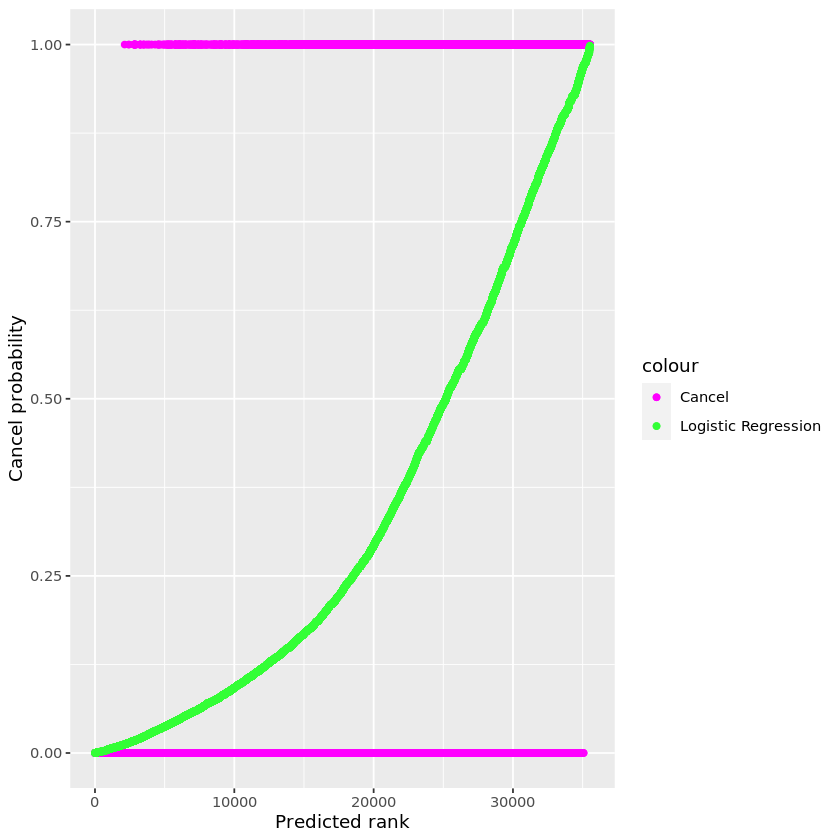

In [94]:
yhat = predict(reglogfinal, newdata, type = "response")
datarank = rank(yhat)

ggplot(newdata) +
geom_point(aes(x = datarank, y = booking_status, colour='Cancel')) +
geom_point(aes(x = datarank, y = yhat, colour='Logistic Regression')) +
scale_color_manual(values = c("Cancel" = '#ff00ff', 'Logistic Regression' = '#33ff36')) +
  xlab(label = 'Predicted rank') +
  ylab(label = 'Cancel probability')

sprintf("%0.f%%", 100*sum( (0.1 < yhat) & (yhat < 0.9) ) / nrow(newdata))

## ANOVA para significancia de coeficientes

### Tipo habitación

In [95]:
aovRT <- aov(booking_status ~ room_type_reserved,data = newdata)
summary.aov(aovRT)

                      Df Sum Sq Mean Sq F value   Pr(>F)    
room_type_reserved     5     11  2.1753   9.803 2.24e-09 ***
Residuals          35522   7883  0.2219                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [96]:
pairwise.t.test(newdata$booking_status, newdata$room_type_reserved, p.adjust.method='fdr')


	Pairwise comparisons using t tests with pooled SD 

data:  newdata$booking_status and newdata$room_type_reserved 

            Room_Type 1 Room_Type 2 Room_Type 4 Room_Type 5 Room_Type 6
Room_Type 2 0.40187     -           -           -           -          
Room_Type 4 0.02314     0.88599     -           -           -          
Room_Type 5 0.40187     0.23318     0.20143     -           -          
Room_Type 6 1.7e-09     0.00324     4.1e-06     0.00036     -          
Room_Type 7 0.75070     0.49107     0.49107     0.85085     0.02314    

P value adjustment method: fdr 

Parece que todas se comportan igual exceptuando la habitación del tipo 6 que presenta diferencias estadísticamente significativas con el resto. También cabe mencionar que existen diferencias entre las habitaciones del tipo 1 y las del tipo 4.

### Mes de llegada

In [97]:
aovAM <- aov(booking_status ~ as.factor(arrival_month),data = newdata)
summary(aovAM)

                            Df Sum Sq Mean Sq F value Pr(>F)    
as.factor(arrival_month)    11    305  27.729   129.8 <2e-16 ***
Residuals                35516   7589   0.214                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [98]:
pairwise.t.test(newdata$booking_status, as.factor(newdata$arrival_month), p.adjust.method='fdr')


	Pairwise comparisons using t tests with pooled SD 

data:  newdata$booking_status and as.factor(newdata$arrival_month) 

   1       2       3       4       5       6       7       8       9      
2  < 2e-16 -       -       -       -       -       -       -       -      
3  < 2e-16 0.00387 -       -       -       -       -       -       -      
4  < 2e-16 1.8e-14 3.1e-07 -       -       -       -       -       -      
5  < 2e-16 2.1e-13 1.6e-06 0.79835 -       -       -       -       -      
6  < 2e-16 < 2e-16 < 2e-16 0.00238 0.00109 -       -       -       -      
7  < 2e-16 < 2e-16 < 2e-16 1.0e-11 2.9e-12 7.7e-05 -       -       -      
8  < 2e-16 < 2e-16 1.4e-14 0.02264 0.01156 0.36786 4.8e-07 -       -      
9  < 2e-16 1.2e-09 0.00165 0.00875 0.02259 4.7e-10 < 2e-16 3.5e-08 -      
10 < 2e-16 5.6e-15 4.2e-07 0.44212 0.65224 1.2e-05 < 2e-16 0.00038 0.02561
11 < 2e-16 0.00392 0.87509 2.4e-08 1.8e-07 < 2e-16 < 2e-16 < 2e-16 0.00037
12 8.8e-11 < 2e-16 < 2e-16 < 2e-16 < 2e-16 < 2e-16 <

Por lo general existen diferencias significativas entre los meses, salvo en varias ocasiones que no contemplaremos por no complicar el modelo.

In [99]:
##proporciones muestrales

prop = NULL
for (j in seq(1,12)){
    prop = length(which(newdata$arrival_month == j & newdata$booking_status == 1))/length(which(newdata$arrival_month == j))
    print(prop)
} 

[1] 0.02474227
[1] 0.2576393
[1] 0.3013345
[1] 0.3693627
[1] 0.3658921
[1] 0.406951
[1] 0.4548287
[1] 0.3964276
[1] 0.3392501
[1] 0.360539
[1] 0.2993127
[1] 0.137342


### Parking

In [100]:
aovparking = aov(booking_status ~ required_car_parking_space, data=newdata)
summary(aovparking)

                              Df Sum Sq Mean Sq F value Pr(>F)    
required_car_parking_space     1     58   58.35   264.6 <2e-16 ***
Residuals                  35526   7835    0.22                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [101]:
##proporciones muestrales

length(which(newdata$required_car_parking_space == 1 & newdata$booking_status == 1))/length(which(newdata$required_car_parking_space == 1))
length(which(newdata$required_car_parking_space == 0 & newdata$booking_status == 1))/length(which(newdata$required_car_parking_space == 0))


[1] 0.1049724

[1] 0.3403984

10% cancel en solicitado

34% cancel en no solicitado

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ca563382-6f70-4aa4-99f1-efca4704b6b0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>